<a href="https://colab.research.google.com/github/veronica1908/SALUD_E3_AIII/blob/main/a_Preprocesamiento_y_analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargar paquetes y librerías

In [4]:
#Instalación de complemento
!pip install sweetviz


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv


#Cargar las bases de datos

In [6]:
# Cargar la base de egresos hospitalarios
df_egresos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_egresos.csv')

# Cargar la base de usuarios
df_usuarios = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_usuarios.csv')

C:\Users\cesar\AppData\Local\Temp\ipykernel_12712\1989573022.py:5: DtypeWarning: Columns (4,6,7,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_usuarios = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_usuarios.csv')


In [7]:
# Cargar la base de datos de crónicos codificación ISO-8859-1
df_cronicos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_cronicos.csv', delimiter=';', encoding='ISO-8859-1')

C:\Users\cesar\AppData\Local\Temp\ipykernel_12712\1912844598.py:2: DtypeWarning: Columns (34,36,39,40,50,52,55,56,58,62,64,65,66,75,107,108,111,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cronicos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_cronic

#Exploración inicial de los datos

In [8]:
print("\nPrimeras filas de la base de usuarios:")
print(df_usuarios.head())

print("\nInformación de la base de usuarios:")
print(df_usuarios.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_usuarios.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)


Primeras filas de la base de usuarios:
     MES  YEAR  NRODOC SEXO     FECHA NACIMIENTO  EDAD DEPARTAMENTO MUNICIPIO  \
0  ABRIL  2017  306221    F  1938-09-09 00:00:00   NaN          NaN       NaN   
1  ABRIL  2017  306222    F  1974-07-03 00:00:00   NaN          NaN       NaN   
2  ABRIL  2017  306223    F  1930-08-24 00:00:00   NaN          NaN       NaN   
3  ABRIL  2017  306224    F  1979-12-01 00:00:00   NaN          NaN       NaN   
4  ABRIL  2017  306225    M  1943-06-01 00:00:00   NaN          NaN       NaN   

  BARRIO FECHA INICIO AL PGP FECHA PRIMERA CLASE FUNCIONAL  \
0    NaN                 NaN                           NaN   
1    NaN                 NaN                           NaN   
2    NaN                 NaN                           NaN   
3    NaN                 NaN                           NaN   
4    NaN                 NaN                           NaN   

  PRIMERA CLASE FUNCIONAL FECHA ÚLTIMA CLASE FUNCIONAL ÚLTIMA CLASE FUNCIONAL  \
0                  

In [9]:
# Mostrar las primeras filas
print("Primeras filas de la base de egresos hospitalarios:")
print(df_egresos.head())

# Información general de los dataframes
print("\nInformación de la base de egresos hospitalarios:")
print(df_egresos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_egresos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Primeras filas de la base de egresos hospitalarios:
   YEAR        MES  NRO ATENCION  NRO INGRESO  SERVICIO HABILITADO COD  \
0  2017       MAYO       3433964      1899917                     -1.0   
1  2017  DICIEMBRE       3720631      2018136                     -1.0   
2  2018    FEBRERO       3912821      2159592                    501.0   
3  2018       MAYO       4023613      2254075                    501.0   
4  2018      JULIO       4080166      2292863                    101.0   

     SERVICIO HABILITADO TIPO IDENTIFICACION  NRODOC         FECHA NACIMIENTO  \
0        Sin Informacion                  CC  308185  1937-07-18 00:00:00.000   
1        Sin Informacion                  CC  308185  1937-07-18 00:00:00.000   
2  Urgencias >= 24 horas                  CC  308185  1937-07-18 00:00:00.000   
3  Urgencias >= 24 horas                  CC  308185  1937-07-18 00:00:00.000   
4        General adultos                  CC  308185  1937-07-18 00:00:00.000   

  REGIMEN AFILIA

In [10]:
print("\nPrimeras filas de la base de crónicos:")
print(df_cronicos.head())

print("\nInformación de la base de crónicos:")
print(df_cronicos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_cronicos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)


Primeras filas de la base de crónicos:
   YEAR      MES Fecha diligenciamiento           Hora  AtenciÃ³n  Ingreso  \
0  2017  OCTUBRE              2/10/2017  9:00:20 a. m.    3912499  2629714   
1  2017  OCTUBRE              2/10/2017  9:04:33 a. m.    3942247  2629726   
2  2017  OCTUBRE              2/10/2017  9:11:43 a. m.    3898560  2629751   
3  2017  OCTUBRE              2/10/2017  9:33:34 a. m.    3912599  2629828   
4  2017  OCTUBRE              2/10/2017  9:43:59 a. m.    3906820  2629717   

  Tipo  NRODOC  Peso  Talla  ...  Diagnostico79 NombreDiagnostico79  \
0   CC  311144  69.0  155.0  ...            NaN                 NaN   
1   CC  308418  62.0  155.0  ...            NaN                 NaN   
2   CC  308573  89.0  163.0  ...            NaN                 NaN   
3   CC  307549  88.0  163.0  ...            NaN                 NaN   
4   CC  307044  58.0  158.0  ...            NaN                 NaN   

   Diagnostico80  NombreDiagnostico80  Diagnostico81  NombreDiag

#Preprocesamiento

##Base Usuarios

In [11]:
# Vamos a filtrar la base solo con los usuarios que tengan 60 años o más.
df_usuarios60 = df_usuarios[df_usuarios['EDAD'] >= 60]

print("\nInformación de la base de usuarios:")
print(df_usuarios60.info())


Información de la base de usuarios:
<class 'pandas.core.frame.DataFrame'>
Index: 130595 entries, 24410 to 183910
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MES                            130595 non-null  object 
 1   YEAR                           130595 non-null  int64  
 2   NRODOC                         130595 non-null  int64  
 3   SEXO                           130595 non-null  object 
 4   FECHA NACIMIENTO               71743 non-null   object 
 5   EDAD                           130595 non-null  float64
 6   DEPARTAMENTO                   71631 non-null   object 
 7   MUNICIPIO                      70954 non-null   object 
 8   BARRIO                         96960 non-null   object 
 9   FECHA INICIO AL PGP            109440 non-null  object 
 10  FECHA PRIMERA CLASE FUNCIONAL  76778 non-null   object 
 11  PRIMERA CLASE FUNCIONAL        78149 non-null   object 

Pasamos de 183911 datos a 130595. Ahora como solo nos interesa la información de los usuarios de acuerdo con su edad, vamos a eliminar las variables que tengan datos nulos y nos quedamos con las que estén completas.

In [12]:
# Eliminar las columnas con datos nulos
df_usuarios60 = df_usuarios60.dropna(axis=1)

# Mostrar las columnas restantes
print(df_usuarios60.columns)

Index(['MES', 'YEAR', 'NRODOC', 'SEXO', 'EDAD', 'CICLO_VITAL', 'QUINQUENIO'], dtype='object')


Pasamos de 16 variables a 7 y con estas trabajaremos en adelante.

##Base Egresos

In [13]:
# Lo primero es filtrar los registros que correspondan al número de documento de los usuarios que fueron filtrados en la base anterior, que corresponden a edad =>60 años
# Filtrar la base de egresos usando la variable NRODOC de la base usuarios
df_egresos60 = df_egresos[df_egresos['NRODOC'].isin(df_usuarios60['NRODOC'])]

# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5781 entries, 0 to 6375
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YEAR                               5781 non-null   int64  
 1   MES                                5781 non-null   object 
 2   NRO ATENCION                       5781 non-null   int64  
 3   NRO INGRESO                        5781 non-null   int64  
 4   SERVICIO HABILITADO COD            5781 non-null   float64
 5   SERVICIO HABILITADO                5781 non-null   object 
 6   TIPO IDENTIFICACION                5781 non-null   object 
 7   NRODOC                             5781 non-null   int64  
 8   FECHA NACIMIENTO                   5781 non-null   object 
 9   REGIMEN AFILIACION                 5781 non-null   object 
 10  EPS VALIDADA                       3736 non-null   object 
 11  MODALIDAD CONTRATO                 5781 non-null   object 
 1

Pasó de tener 6376 registros a 5781 que corresponden a los usuarios con edad igual o mayor a los 60 años.

In [14]:
# Verificamos las cantidades de datos nulos por variable
# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_egresos60.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Variables con  datos nulos:
FECHA POSIBLE ALTA              5646
CAUSA BASICA CAPITULO COD       5294
CAUSA BASICA CATEGORIA COD      5294
CAUSA BASICA MUERTE COD         5292
PERTINENCIA DIAGNOSTICA         4706
                                ... 
SERVICIO EGRESO                    0
TIPO EGRESO                        0
FECHA ALTA MEDICA                  0
MES                                0
PROFESIONAL ESPECIALIDAD GRD       0
Length: 66, dtype: int64


In [15]:
# TOMAR SOLO LAS VARIABLES A UTILIZAR

df_egresos60 = df_egresos60[['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'TIPO IDENTIFICACION', 'NRODOC', 'FECHA NACIMIENTO', 'REGIMEN AFILIACION', 'MODALIDAD CONTRATO',
                             'FUENTE FINANCIACION1','FUENTE FINANCIACION2', 'VIA INGRESO', 'SERVICIO EGRESO', 'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
                             'FECHA SALIDA', 'DEMORA SALIDA CLINICA (DIAS)','TIPO DIAGNOSTICO PRINCIPAL']]
# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5781 entries, 0 to 6375
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          5781 non-null   int64  
 1   MES                           5781 non-null   object 
 2   NRO ATENCION                  5781 non-null   int64  
 3   NRO INGRESO                   5781 non-null   int64  
 4   TIPO IDENTIFICACION           5781 non-null   object 
 5   NRODOC                        5781 non-null   int64  
 6   FECHA NACIMIENTO              5781 non-null   object 
 7   REGIMEN AFILIACION            5781 non-null   object 
 8   MODALIDAD CONTRATO            5781 non-null   object 
 9   FUENTE FINANCIACION1          5781 non-null   object 
 10  FUENTE FINANCIACION2          5781 non-null   object 
 11  VIA INGRESO                   5781 non-null   object 
 12  SERVICIO EGRESO               5781 non-null   object 
 13  TIPO EGR

Pasamos de 63 variables a 19. Ahora vamos a tratar los datos nulos que quedan en estas variables, para ello se eliminan las filas que poseen datos nulos, ya que justamente son las que indican la fecha de ingreso a la clínica y al servicio, por lo que es imprescindible tener la información. Aquí se pasaría entonces a tener 3737 registros, es decir, se perdería el 35.3% de los registros.

In [16]:
# Eliminar filas con datos nulos
df_egresos60 = df_egresos60.dropna()

# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3737 entries, 2 to 6375
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          3737 non-null   int64  
 1   MES                           3737 non-null   object 
 2   NRO ATENCION                  3737 non-null   int64  
 3   NRO INGRESO                   3737 non-null   int64  
 4   TIPO IDENTIFICACION           3737 non-null   object 
 5   NRODOC                        3737 non-null   int64  
 6   FECHA NACIMIENTO              3737 non-null   object 
 7   REGIMEN AFILIACION            3737 non-null   object 
 8   MODALIDAD CONTRATO            3737 non-null   object 
 9   FUENTE FINANCIACION1          3737 non-null   object 
 10  FUENTE FINANCIACION2          3737 non-null   object 
 11  VIA INGRESO                   3737 non-null   object 
 12  SERVICIO EGRESO               3737 non-null   object 
 13  TIPO EGR

In [17]:
# Convertir columnas de fecha al tipo datetime
df_egresos60['FECHA NACIMIENTO'] = pd.to_datetime(df_egresos60['FECHA NACIMIENTO'])
df_egresos60['FECHA SALIDA'] = pd.to_datetime(df_egresos60['FECHA SALIDA'])
df_egresos60['FECHA INGRESO SERVICIO'] = pd.to_datetime(df_egresos60['FECHA INGRESO SERVICIO'])

# Calcular el tiempo de estancia hospitalaria
df_egresos60['TIEMPO ESTANCIA (DIAS)'] = (df_egresos60['FECHA SALIDA'] - df_egresos60['FECHA INGRESO SERVICIO']).dt.days

# Convertir columnas numéricas a int
columnas_numericas = ['NRO ATENCION', 'NRO INGRESO', 'NRODOC']
df_egresos60[columnas_numericas] = df_egresos60[columnas_numericas].astype(int)

# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3737 entries, 2 to 6375
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   YEAR                          3737 non-null   int64         
 1   MES                           3737 non-null   object        
 2   NRO ATENCION                  3737 non-null   int32         
 3   NRO INGRESO                   3737 non-null   int32         
 4   TIPO IDENTIFICACION           3737 non-null   object        
 5   NRODOC                        3737 non-null   int32         
 6   FECHA NACIMIENTO              3737 non-null   datetime64[ns]
 7   REGIMEN AFILIACION            3737 non-null   object        
 8   MODALIDAD CONTRATO            3737 non-null   object        
 9   FUENTE FINANCIACION1          3737 non-null   object        
 10  FUENTE FINANCIACION2          3737 non-null   object        
 11  VIA INGRESO                   3737 

##Base Crónicos

In [18]:
# Analizamos que hay en la base de datos.
df_cronicos.head(10)

YEAR      MES Fecha diligenciamiento            Hora  AtenciÃ³n  Ingreso  \
0  2017  OCTUBRE              2/10/2017   9:00:20 a. m.    3912499  2629714   
1  2017  OCTUBRE              2/10/2017   9:04:33 a. m.    3942247  2629726   
2  2017  OCTUBRE              2/10/2017   9:11:43 a. m.    3898560  2629751   
3  2017  OCTUBRE              2/10/2017   9:33:34 a. m.    3912599  2629828   
4  2017  OCTUBRE              2/10/2017   9:43:59 a. m.    3906820  2629717   
5  2017  OCTUBRE              2/10/2017   9:51:22 a. m.    3935619  2629892   
6  2017  OCTUBRE              2/10/2017   9:59:17 a. m.    3941021  2629907   
7  2017  OCTUBRE             11/10/2017   3:27:42 p. m.    3952389  2640869   
8  2017  OCTUBRE              2/10/2017  10:19:11 a. m.    3912623  2629716   
9  2017  OCTUBRE              2/10/2017  10:23:56 a. m.    3897898  2629989   

  Tipo  NRODOC  Peso  Talla  ...  Diagnostico79 NombreDiagnostico79  \
0   CC  311144  69.0  155.0  ...            NaN                 NaN   
1   CC  308418  62.0  155.0  ...            NaN                 NaN   
2   CC  308573  89.0  163.0  ...            NaN                 NaN   
3   CC  307549  88.0  163.0  ...            NaN                 NaN   
4   CC  307044  58.0  158.0  ...            NaN                 NaN   
5   CC  309419  53.0  146.0  ...            NaN                 NaN   
6   CC  308437  43.0  139.0  ...            NaN                 NaN   
7   CC  308437  43.0  138.0  ...            NaN                 NaN   
8   CC  308637  55.0  158.0  ...            NaN                 NaN   
9   CC  308561  71.0  160.0  ...            NaN                 NaN   

   Diagnostico80  NombreDiagnostico80  Diagnostico81  NombreDiagnostico81  \
0            NaN                  NaN            NaN                  NaN   
1            NaN                  NaN            NaN                  NaN   
2            NaN                  NaN            NaN                  NaN   
3            NaN                  NaN            NaN                  NaN   
4            NaN                  NaN            NaN                  NaN   
5            NaN                  NaN            NaN                  NaN   
6            NaN                  NaN            NaN                  NaN   
7            NaN                  NaN            NaN                  NaN   
8            NaN                  NaN            NaN                  NaN   
9            NaN                  NaN            NaN                  NaN   

   Diagnostico82  NombreDiagnostico82  Diagnostico83  NombreDiagnostico83  
0            NaN                  NaN            NaN                  NaN  
1            NaN                  NaN            NaN                  NaN  
2            NaN                  NaN            NaN                  NaN  
3            NaN                  NaN            NaN                  NaN  
4            NaN                  NaN            NaN                  NaN  
5            NaN                  NaN            NaN                  NaN  
6            NaN                  NaN            NaN                  NaN  
7            NaN                  NaN            NaN                  NaN  
8            NaN                  NaN            NaN                  NaN  
9            NaN                  NaN            NaN                  NaN  

[10 rows x 290 columns]

In [19]:
df_cronicos.dtypes

YEAR                       int64
MES                       object
Fecha diligenciamiento    object
Hora                      object
AtenciÃ³n                  int64
                           ...  
NombreDiagnostico81       object
Diagnostico82             object
NombreDiagnostico82       object
Diagnostico83             object
NombreDiagnostico83       object
Length: 290, dtype: object

In [20]:
nombres_columnas = df_cronicos.columns.tolist()
print(nombres_columnas)

['YEAR', 'MES', 'Fecha diligenciamiento', 'Hora', 'AtenciÃ³n', 'Ingreso', 'Tipo', 'NRODOC', 'Peso', 'Talla', 'IMC', 'ClasificaciÃ³n IMC', 'SaturaciÃ³n de OxÃ\xadgeno (%)', 'PerÃ\xadmetro Muslo', 'PerÃ\xadmetro Cintura', 'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues', 'PresiÃ³n Arterial SistÃ³lica', 'PresiÃ³n Arterial DiastÃ³lica', 'Frecuencia CardÃ\xadaca en reposo', 'Auto-calificacion Nivel de Ejercicio', 'Constantes', 'METS -Ã\x8dndice MetabÃ³lico', 'VO2 - MÃ¡xima Cantidad de OxÃ\xadgeno', 'Ã\x8dndice de Fragilidad Groningen', 'CalificaciÃ³n (Ã\x8dndice de Fragilidad)', 'Tiempo en Segundos (Apoyo Monopodal)', 'CalificaciÃ³n (Apoyo Monopodal)', 'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)', 'CalificaciÃ³n Velocidad', 'Test Findrisc', 'Ã\x8dndice Tobillo/Brazo', 'Observaciones', 'PresiÃ³n arterial registro medico', 'Diabetes Mellitus', 'Tipo diabetes mellitus', 'Es insulinorequiriente', 'Tiempo con el diagnÃ³stico', 'Glicemia', 'Fecha glicemia

In [21]:
# Lo primero es filtrar los registros que correspondan al número de documento de los usuarios que fueron filtrados en la base usuarios, que corresponden a edad =>60 años
# Filtrar la base de cronicos usando la variable NRODOC de la base usuarios
df_cronicos60 = df_cronicos[df_cronicos['NRODOC'].isin(df_usuarios60['NRODOC'])]

# Verificar el nuevo conjunto de datos
print(df_cronicos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35055 entries, 0 to 38716
Columns: 290 entries, YEAR to NombreDiagnostico83
dtypes: float64(38), int64(11), object(241)
memory usage: 77.8+ MB
None


Pasó de tener 38717 registros a 35055 que corresponden a los usuarios con edad igual o mayor a los 60 años.

In [22]:
# Verificamos las cantidades de datos nulos por variable
# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_cronicos60.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Variables con  datos nulos:
Otras Morbilidades                        35055
NombreDiagnostico82                       35042
Diagnostico82                             35042
NombreDiagnostico83                       35042
Diagnostico83                             35042
                                          ...  
CalificaciÃ³n (Apoyo Monopodal)               0
Tiempo en Segundos (Recorrer 5 metros)        0
Velocidad (m/s)                               0
CalificaciÃ³n Velocidad                       0
YEAR                                          0
Length: 290, dtype: int64


In [23]:
##########################Evaluar si aplicarlo o no, pasaría de tener 290 variables a  tener 72#################
# ELIMINAR LAS VARIABLES (COLUMNAS) CON MÁS DEL 20% DE DATOS NULOS
#Calcular el porcentaje de datos nulos por columna
nulos_por_columna = df_cronicos60.isnull().sum() / len(df_cronicos60) * 100

# Seleccionar las columnas con más del 20% de datos nulos
columnas_eliminar = nulos_por_columna[nulos_por_columna > 20].index

# Eliminar las columnas seleccionadas del DataFrame
df_cronicos60 = df_cronicos60.drop(columns=columnas_eliminar)

# Verificar el nuevo conjunto de datos
print(df_cronicos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35055 entries, 0 to 38716
Data columns (total 72 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       35055 non-null  int64  
 1   MES                                        35055 non-null  object 
 2   Fecha diligenciamiento                     35055 non-null  object 
 3   Hora                                       35055 non-null  object 
 4   AtenciÃ³n                                  35055 non-null  int64  
 5   Ingreso                                    35055 non-null  int64  
 6   Tipo                                       35055 non-null  object 
 7   NRODOC                                     35055 non-null  int64  
 8   Peso                                       35055 non-null  float64
 9   Talla                                      35055 non-null  float64
 10  IMC                        

Pasamos de 290 variables a 72. Ahora verificamos las variables de fechas.

In [24]:
# Verificar la forma de los datos de las variables de fechas para aplicar formato
print(df_cronicos60[['Fecha diligenciamiento','Hora','Fecha glicemia','Fecha hemoglobina glicosilada','Fecha HDL',
                     'Fecha colesterol total','Fecha trigliceridos','Fecha creatinina1','Fecha microalbuminuria']])

      Fecha diligenciamiento           Hora   Fecha glicemia  \
0                  2/10/2017  9:00:20 a. m.               ND   
1                  2/10/2017  9:04:33 a. m.               ND   
2                  2/10/2017  9:11:43 a. m.               ND   
3                  2/10/2017  9:33:34 a. m.               ND   
4                  2/10/2017  9:43:59 a. m.               ND   
...                      ...            ...              ...   
38712             31/05/2022  10:55:31 p.m.   2/09/2021 0:00   
38713             31/05/2022  10:59:58 p.m.  12/10/2021 0:00   
38714             31/05/2022  11:13:57 p.m.   9/09/2021 0:00   
38715             31/05/2022  11:17:35 p.m.   9/02/2022 0:00   
38716             31/05/2022  11:25:39 p.m.   7/04/2022 0:00   

      Fecha hemoglobina glicosilada        Fecha HDL Fecha colesterol total  \
0                                ND               ND                     ND   
1                                ND               ND                     

In [25]:
# Como las variables 'Fecha glicemia','Fecha hemoglobina glicosilada','Fecha HDL','Fecha colesterol total','Fecha trigliceridos','Fecha creatinina1','Fecha microalbuminuria'
# no contienen realmente datos, se procede a eliminar dichas columnas.

columns_to_drop = ['Fecha glicemia', 'Fecha hemoglobina glicosilada',
                   'Fecha HDL', 'Fecha colesterol total', 'Fecha trigliceridos', 'Fecha creatinina1',
                   'Fecha microalbuminuria']

df_cronicos60.drop(columns=columns_to_drop, inplace=True)

#Quedamos con 65 variables

In [26]:
df_cronicos60.isnull().sum()

#nombres_columnas = df_cronicos.columns.tolist()
#print(nombres_columnas)

YEAR                                0
MES                                 0
Fecha diligenciamiento              0
Hora                                0
AtenciÃ³n                           0
                                 ... 
Cambio de TFG                     955
Ãlcera de pie diabÃ©tico        2684
RemisiÃ³n                         955
DiagnÃ³stico Principal           1231
AnÃ¡lisis y conducta a seguir     957
Length: 65, dtype: int64

Ahora vamos a tratar los datos nulos que quedan en estas variables, para ello se eliminan las filas que poseen datos nulos.

In [27]:
# Eliminar filas con datos nulos #################DEFINIR SI LO HACEMOS O NO, SE PIERDE EL 32.7% DE LOS REGISTROS.
df_cronicos60 = df_cronicos60.dropna()

# Verificar el nuevo conjunto de datos
print(df_cronicos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26322 entries, 0 to 38716
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       26322 non-null  int64  
 1   MES                                        26322 non-null  object 
 2   Fecha diligenciamiento                     26322 non-null  object 
 3   Hora                                       26322 non-null  object 
 4   AtenciÃ³n                                  26322 non-null  int64  
 5   Ingreso                                    26322 non-null  int64  
 6   Tipo                                       26322 non-null  object 
 7   NRODOC                                     26322 non-null  int64  
 8   Peso                                       26322 non-null  float64
 9   Talla                                      26322 non-null  float64
 10  IMC                        

Se pasa de 35055 registros a 23563, perdiendo el 32.7% de los datos.

In [28]:
#Ajustar formatos de fechas
df_cronicos60['Fecha diligenciamiento'] = pd.to_datetime(df_cronicos60['Fecha diligenciamiento'])
df_cronicos60['Hora'] = pd.to_datetime(df_cronicos60['Hora'])

ValueError: time data "31/10/2017" doesn't match format "%m/%d/%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
#Renombramos algunas columnas que tienen problemas con la escritura

df_cronicos60.rename(columns={'AtenciÃ³n': 'Atencion'}, inplace=True)
df_cronicos60.rename(columns={'ClasificaciÃ³n IMC': 'Clasificacion IMC'}, inplace=True)
df_cronicos60.rename(columns={'SaturaciÃ³n de OxÃ­geno (%)': 'Saturacion de oxigeno'}, inplace=True)
df_cronicos60.rename(columns={'PerÃ­metro Muslo': 'Perimetro muslo'}, inplace=True)
df_cronicos60.rename(columns={'PerÃ­metro Cintura': 'Perimetro cintura'}, inplace=True)
df_cronicos60.rename(columns={'PresiÃ³n Arterial SistÃ³lica': 'Presion arterial sistolica'}, inplace=True)
df_cronicos60.rename(columns={'PresiÃ³n Arterial DiastÃ³lica': 'Presion arterial diastolica'}, inplace=True)
df_cronicos60.rename(columns={'METS -Ãndice MetabÃ³lico': 'METS indice metabolico'}, inplace=True)
df_cronicos60.rename(columns={'VO2 - MÃ¡xima Cantidad de OxÃ­geno': 'VO2 Maxima cantidad de oxigeno'}, inplace=True)
df_cronicos60.rename(columns={'Ãndice de Fragilidad Groningen': 'Indice de fragilidad groningen'}, inplace=True)
df_cronicos60.rename(columns={'CalificaciÃ³n (Ãndice de Fragilidad)': 'Calificacion indice de fragilidad'}, inplace=True)
df_cronicos60.rename(columns={'CalificaciÃ³n (Apoyo Monopodal)': 'Calificacion apoyo monopodal'}, inplace=True)
df_cronicos60.rename(columns={'CalificaciÃ³n Velocidad': 'Calificacion velocidad'}, inplace=True)
df_cronicos60.rename(columns={'Tiempo con el diagnÃ³stico1': 'Tiempo con el diagnostico1'}, inplace=True)
df_cronicos60.rename(columns={'Enfermedad Coronaria (En el Ãºltimo aÃ±o)': 'Enermedad coronaria en el ultimo año'}, inplace=True)
df_cronicos60.rename(columns={'Insuficiencia CardÃ­aca': 'Insuficiencia cardiaca'}, inplace=True)
df_cronicos60.rename(columns={'ValvulopatÃ­a': 'Valvulopatia'}, inplace=True)
df_cronicos60.rename(columns={'Cuantos cigarrillos dÃ­a': 'Cuantos cigarrillos al dia'}, inplace=True)
df_cronicos60.rename(columns={'Tasa de FiltraciÃ³n Glomerular TFG': 'Tasa de filtracion glomerular TFG'}, inplace=True)
df_cronicos60.rename(columns={'Tasa de FiltraciÃ³n Glomerular TFG2': 'Tasa de filtracion glomerular TFG2'}, inplace=True)
df_cronicos60.rename(columns={'Ãlcera de pie diabÃ©tico': 'Ulcera de pie diabetico'}, inplace=True)
df_cronicos60.rename(columns={'RemisiÃ³n': 'Remision'}, inplace=True)
df_cronicos60.rename(columns={'DiagnÃ³stico Principal': 'Diagnostico principal'}, inplace=True)
df_cronicos60.rename(columns={'AnÃ¡lisis y conducta a seguir': 'Analisis y conducta a seguir'}, inplace=True)
df_cronicos60.rename(columns={'Frecuencia CardÃ­aca en reposo': 'Frecuencia Cardi­aca en reposo'}, inplace=True)

# Verificamos
print(df_cronicos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26322 entries, 0 to 38716
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       26322 non-null  int64  
 1   MES                                        26322 non-null  object 
 2   Fecha diligenciamiento                     26322 non-null  object 
 3   Hora                                       26322 non-null  object 
 4   Atencion                                   26322 non-null  int64  
 5   Ingreso                                    26322 non-null  int64  
 6   Tipo                                       26322 non-null  object 
 7   NRODOC                                     26322 non-null  int64  
 8   Peso                                       26322 non-null  float64
 9   Talla                                      26322 non-null  float64
 10  IMC                        

In [ ]:
#Ahora verificamos las categorías de las variables
for column in df_cronicos60.columns:
    print(f"Valores únicos para {column}:")
    print(df_cronicos60[column].unique())
    print("------------------------------------------------------")

Valores únicos para YEAR:
[2017 2018 2021 2022]
------------------------------------------------------
Valores únicos para MES:
['OCTUBRE' 'NOVIEMBRE' 'DICIEMBRE' 'ENERO' 'FEBRERO' 'MARZO' 'MAYO'
 'JUNIO' 'JULIO' 'AGOSTO' 'SEPTIEMBRE' 'ABRIL']
------------------------------------------------------
Valores únicos para Fecha diligenciamiento:
['2/10/2017' '11/10/2017' '31/10/2017' '3/10/2017' '4/10/2017' '5/10/2017'
 '6/10/2017' '9/10/2017' '25/10/2017' '13/10/2017' '10/10/2017'
 '18/10/2017' '12/10/2017' '27/10/2017' '19/10/2017' '17/10/2017'
 '20/10/2017' '23/10/2017' '24/10/2017' '26/10/2017' '30/10/2017'
 '1/11/2017' '30/11/2017' '2/11/2017' '22/11/2017' '3/11/2017' '7/11/2017'
 '29/11/2017' '8/11/2017' '24/11/2017' '15/11/2017' '9/11/2017'
 '10/11/2017' '14/11/2017' '27/11/2017' '16/11/2017' '17/11/2017'
 '20/11/2017' '21/11/2017' '23/11/2017' '28/11/2017' '1/12/2017'
 '4/12/2017' '5/12/2017' '6/12/2017' '29/12/2017' '7/12/2017' '11/12/2017'
 '12/12/2017' '13/12/2017' '14/12/2017' '

In [ ]:
#Unificamos algunas categorías

# Unificar las categorías 'CC' y 'CC ' en Tipo
df_cronicos60['Tipo'] = df_cronicos60['Tipo'].replace('CC ', 'CC')

# Verificar que las categorías se hayan unificado correctamente
print(df_cronicos60['Tipo'].unique())

['CC' 'CE']


In [ ]:
# Ajustar los valores 'FrÃ¡gil' a 'Frágil' en Calificacion indice de fragilidad
df_cronicos60['Calificacion indice de fragilidad'] = df_cronicos60['Calificacion indice de fragilidad'].replace('FrÃ¡gil', 'Fragil')

# Verificar que las categorías se hayan ajustado correctamente
print(df_cronicos60['Calificacion indice de fragilidad'].unique())

['Fragil' 'Normal']


In [ ]:
# Ajustar los valores 'FrÃ¡gil' a 'Frágil' en Calificacion velocidad
df_cronicos60['Calificacion velocidad'] = df_cronicos60['Calificacion velocidad'].replace('Malo - FrÃ¡gil', 'Malo - Fragil')

# Verificar que las categorías se hayan ajustado correctamente
print(df_cronicos60['Calificacion velocidad'].unique())

['Aceptable' 'Deficiente' 'Malo - Fragil' 'Bueno']


In [ ]:
# Ajustar los valores en Diagnostico principal
df_cronicos60['Diagnostico principal'] = df_cronicos60['Diagnostico principal'].replace('I481 - FibrilaciÃ³n auricular persistente', 'I481 - FIBRILACION AURICULAR PERSISTENTE')
df_cronicos60['Diagnostico principal'] = df_cronicos60['Diagnostico principal'].replace('I870 - SÃ\x8dNDROME POSTROMBOTICO', 'I870 - SINDROME POSTROMBOTICO')
# Verificar que las categorías se hayan ajustado correctamente
print(df_cronicos60['Diagnostico principal'].unique())

['I10X - HIPERTENSION ESENCIAL (PRIMARIA)'
 'E118 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS'
 'E109 - DIABETES MELLITUS INSULINODEPENDIENTE SIN MENCION DE COMPLICACION'
 'E103 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES OFTALMICAS'
 'E119 - DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION'
 'J448 - OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRONICAS ESPECIFICADAS'
 'I358 - OTROS TRASTORNOS DE LA VALVULA AORTICA'
 'I350 - ESTENOSIS (DE LA VALVULA) AORTICA'
 'E107 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES MULTIPLES'
 'I694 - SECUELAS DE ENFERMEDAD CEREBROVASCULAR NO ESPECIFICADA COMO HEMORRAGICA U OCLUSIVA'
 'I255 - CARDIOMIOPATIA ISQUEMICA'
 'J449 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA NO ESPECIFICADA'
 'E104 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NEUROLOGICAS'
 'G301 - ENFERMEDAD DE ALZHEIMER DE COMIENZO TARDIO'
 'E039 - HIPOTIROIDISMO NO ESPECIFICADO'
 'E102 - DIABETES MELLI

## Exportamos bases preprocesadas

In [ ]:
df_usuarios60.to_csv('df_usuarios60.csv', index=False)
df_egresos60.to_csv('df_egresos60.csv', index=False)
df_cronicos60.to_csv('df_cronicos60.csv', index=False)

In [ ]:
files.download('df_usuarios60.csv')
files.download('df_egresos60.csv')
files.download('df_cronicos60.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Análisis exploratorio

##Base usuarios

In [ ]:
#Resumen Estadístico: Descripción básica de las variables numéricas
print(df_usuarios60.describe())

                YEAR         NRODOC           EDAD
count  130595.000000  130595.000000  130595.000000
mean     2019.732218  309848.536812      76.842651
std         1.818790    2138.946885       9.089157
min      2017.000000  306221.000000      60.000000
25%      2018.000000  308030.000000      70.000000
50%      2021.000000  309818.000000      76.000000
75%      2021.000000  311546.000000      84.000000
max      2022.000000  314288.000000     106.000000


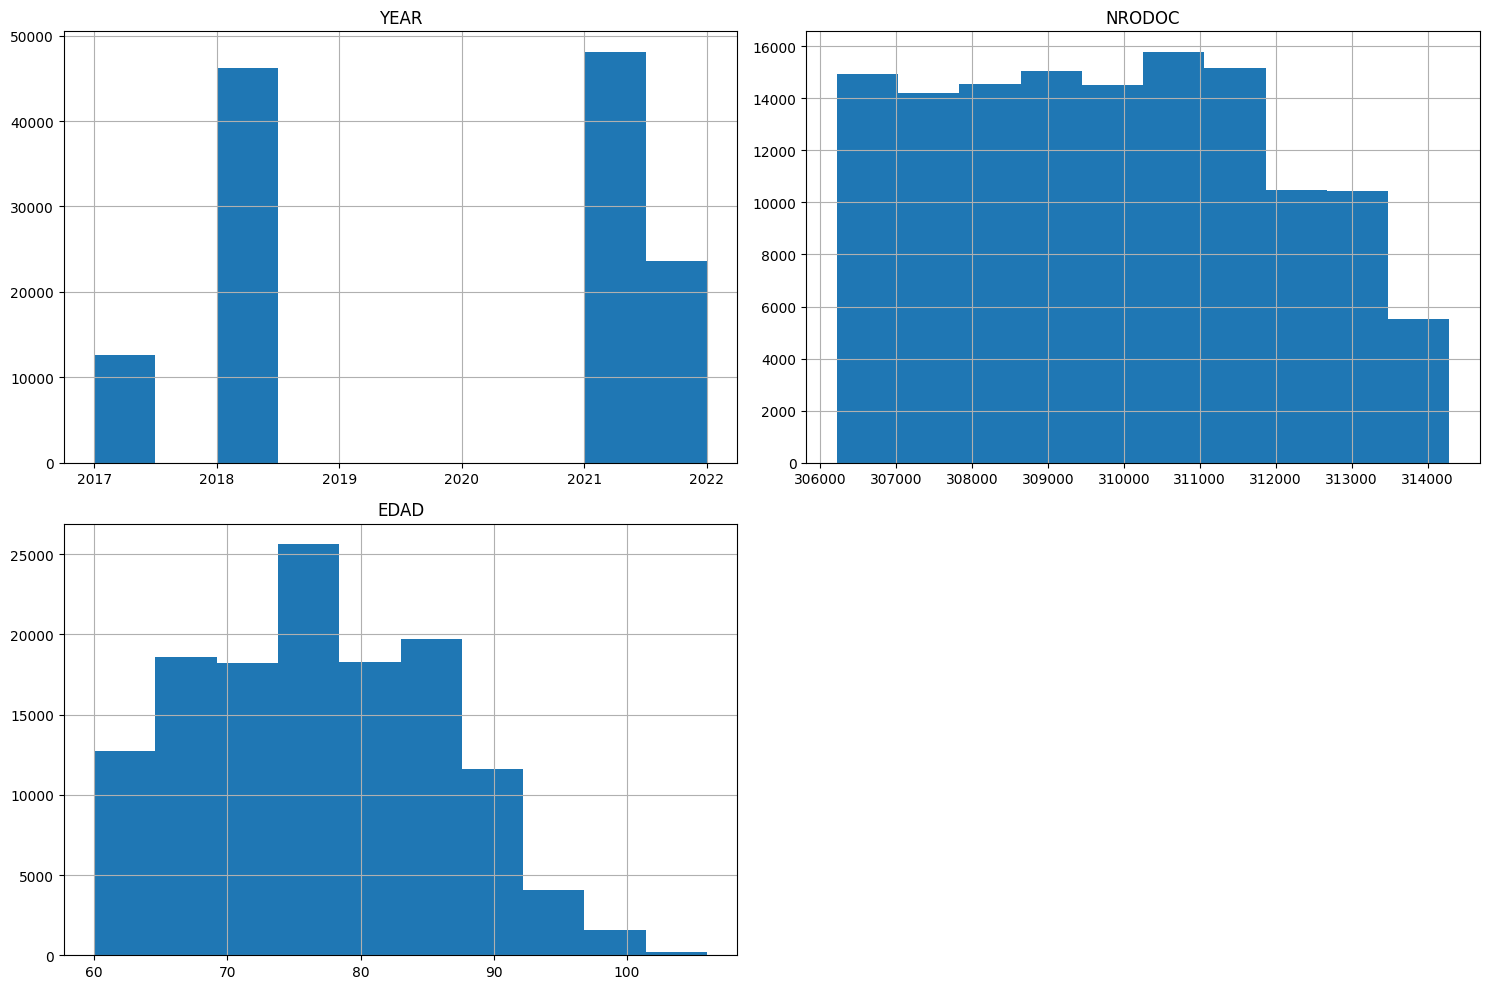

In [ ]:
# Distribución de variables numéricas
df_usuarios60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
#Distribución de Variables Categóricas
for column in df_usuarios60.select_dtypes(include=['object']).columns:
    print(df_usuarios60[column].value_counts())

MES
OCTUBRE       12485
ENERO         12484
DICIEMBRE     12456
SEPTIEMBRE    12351
FEBRERO       12347
MARZO         12267
JUNIO         12026
MAYO          11979
AGOSTO         8119
JULIO          8112
NOVIEMBRE      8110
ABRIL          7859
Name: count, dtype: int64
SEXO
F    83774
M    46821
Name: count, dtype: int64
CICLO_VITAL
Vejez    130595
Name: count, dtype: int64
QUINQUENIO
75-79     24956
70-74     23335
80-84     22711
65-69     18600
85-89     16554
60-64     12720
>90       11719
Name: count, dtype: int64


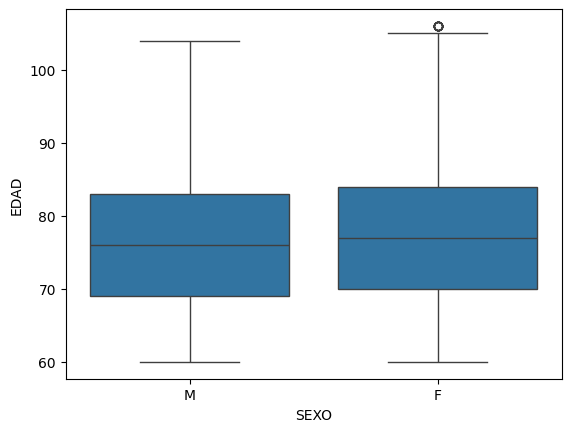

In [ ]:
#Comparación entre grupos
sns.boxplot(x='SEXO', y='EDAD', data=df_usuarios60)
plt.show()

##Base egresos

In [ ]:
#Resumen Estadístico: Descripción básica de las variables numéricas
print(df_egresos60.describe())

              YEAR  NRO ATENCION   NRO INGRESO         NRODOC  \
count  3737.000000  3.737000e+03  3.737000e+03    3737.000000   
mean   2019.130586  4.720614e+06  2.912322e+06  309637.522344   
min    2017.000000  3.563763e+06  2.035230e+06  306223.000000   
25%    2018.000000  4.035078e+06  2.265138e+06  307845.000000   
50%    2018.000000  4.384978e+06  2.432683e+06  309697.000000   
75%    2021.000000  5.630625e+06  3.847111e+06  311371.000000   
max    2021.000000  5.935800e+06  4.167574e+06  314023.000000   
std       1.474468  7.939285e+05  8.034599e+05    2012.730756   

                    FECHA NACIMIENTO         FECHA INGRESO SERVICIO  \
count                           3737                           3737   
mean   1941-04-29 11:28:35.707787008  2019-08-24 04:54:21.916619776   
min              1912-10-27 00:00:00     2017-12-19 17:40:00.860000   
25%              1934-05-27 00:00:00  2018-06-07 00:00:58.123000064   
50%              1940-10-25 00:00:00  2018-10-21 16:07:18.3

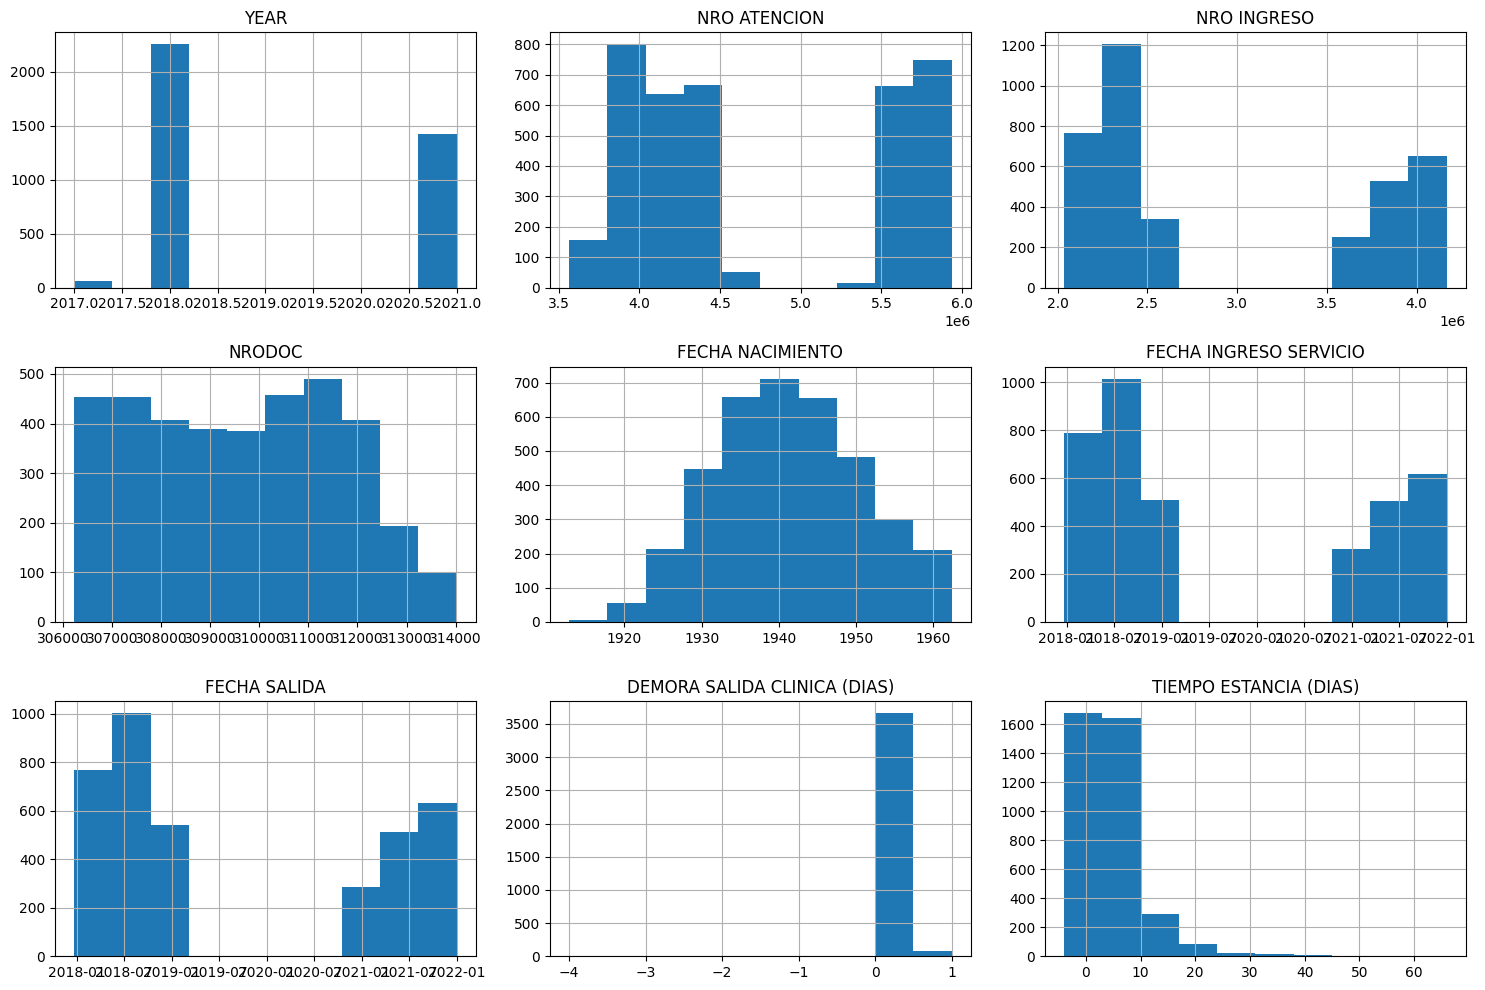

In [ ]:
# Distribución de variables numéricas
df_egresos60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
#Distribución de Variables Categóricas
for column in df_egresos60.select_dtypes(include=['object']).columns:
    print(df_egresos60[column].value_counts())

MES
DICIEMBRE     418
MARZO         362
OCTUBRE       353
AGOSTO        344
SEPTIEMBRE    337
JUNIO         316
JULIO         314
ENERO         313
FEBRERO       303
NOVIEMBRE     296
MAYO          295
ABRIL          86
Name: count, dtype: int64
TIPO IDENTIFICACION
CC    3737
Name: count, dtype: int64
REGIMEN AFILIACION
Contributivo          3731
Soat                     2
Subsidiado               2
Particular               1
Medicina prepagada       1
Name: count, dtype: int64
MODALIDAD CONTRATO
PGP       3637
Evento     100
Name: count, dtype: int64
FUENTE FINANCIACION1
NUEVA EPS                      3733
QBE SEGUROS S.A.                  1
PARTICULAR                        1
AXA COLPATRIA SEGUROS S.A         1
ALLIANZ SEGUROS DE VIDA S.A       1
Name: count, dtype: int64
FUENTE FINANCIACION2
NUEVA EPS                           3424
Sin información                      290
PARTICULAR                            18
UNIVERSIDAD DE ANTIOQUIA               3
JSS Medical Research LATAM S.A

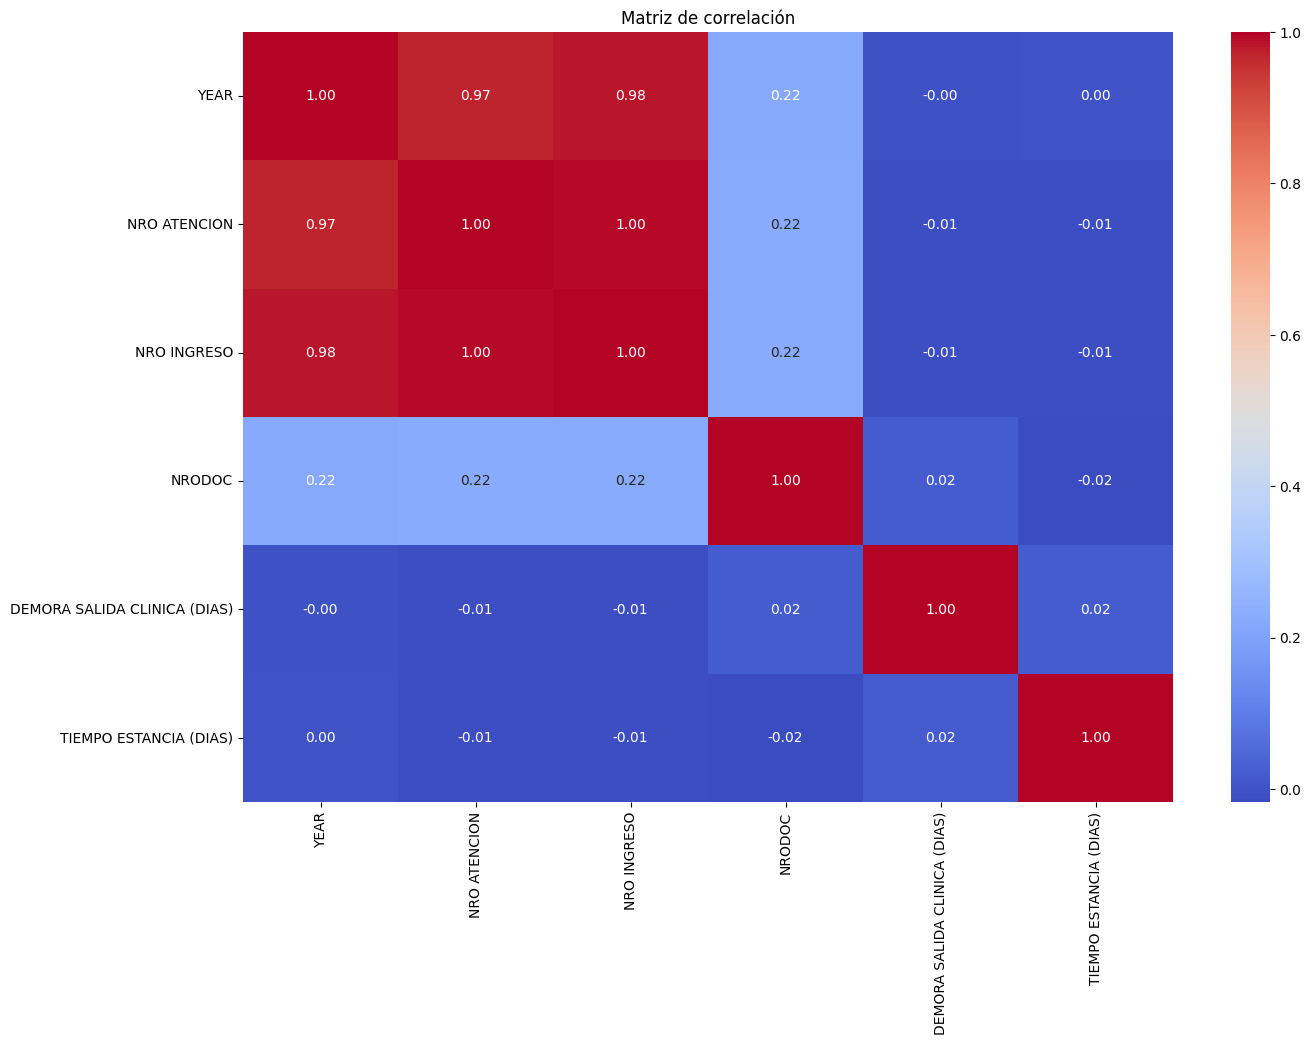

In [ ]:
#Correlación entre Variables: Matriz de correlación para variables numéricas.
# Seleccionar solo las columnas numéricas
numeric_cols = df_egresos60.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_egresos60[numeric_cols].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

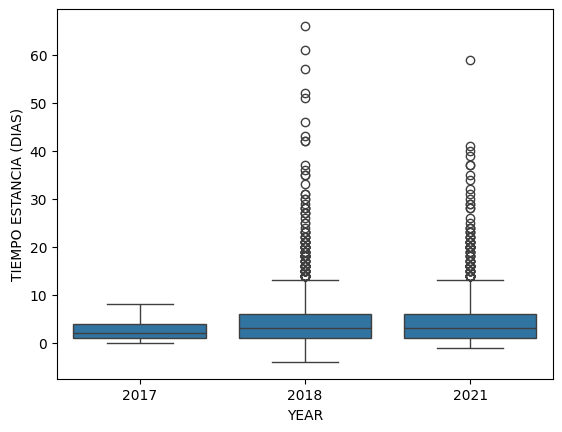

In [ ]:
#Comparación entre Grupos
sns.boxplot(x='YEAR', y='TIEMPO ESTANCIA (DIAS)', data=df_egresos60)
plt.show()

##Base crónicos

In [ ]:
# Resumen Estadístico:Descripción básica de las variables numéricas
print(df_cronicos60.describe())

               YEAR      Atencion       Ingreso         NRODOC          Peso  \
count  26322.000000  2.632200e+04  2.632200e+04   26322.000000  26322.000000   
mean    2019.962883  4.967856e+06  3.490407e+06  309819.212560     71.122153   
std        1.796458  8.222090e+05  6.629563e+05    2068.403296    384.777876   
min     2017.000000  3.408530e+06  2.049927e+06  306221.000000      5.000000   
25%     2018.000000  4.228058e+06  2.808843e+06  308055.000000     59.000000   
50%     2021.000000  5.093746e+06  3.748032e+06  309833.000000     68.000000   
75%     2021.000000  5.789290e+06  4.076914e+06  311499.000000     77.000000   
max     2022.000000  6.125234e+06  4.365936e+06  314219.000000  62153.000000   

              Talla            IMC  Saturacion de oxigeno  Perimetro muslo  \
count  26322.000000   26322.000000           26322.000000     26322.000000   
mean     157.804547     256.433114              94.326153        49.155155   
std      159.550456    8895.739924           

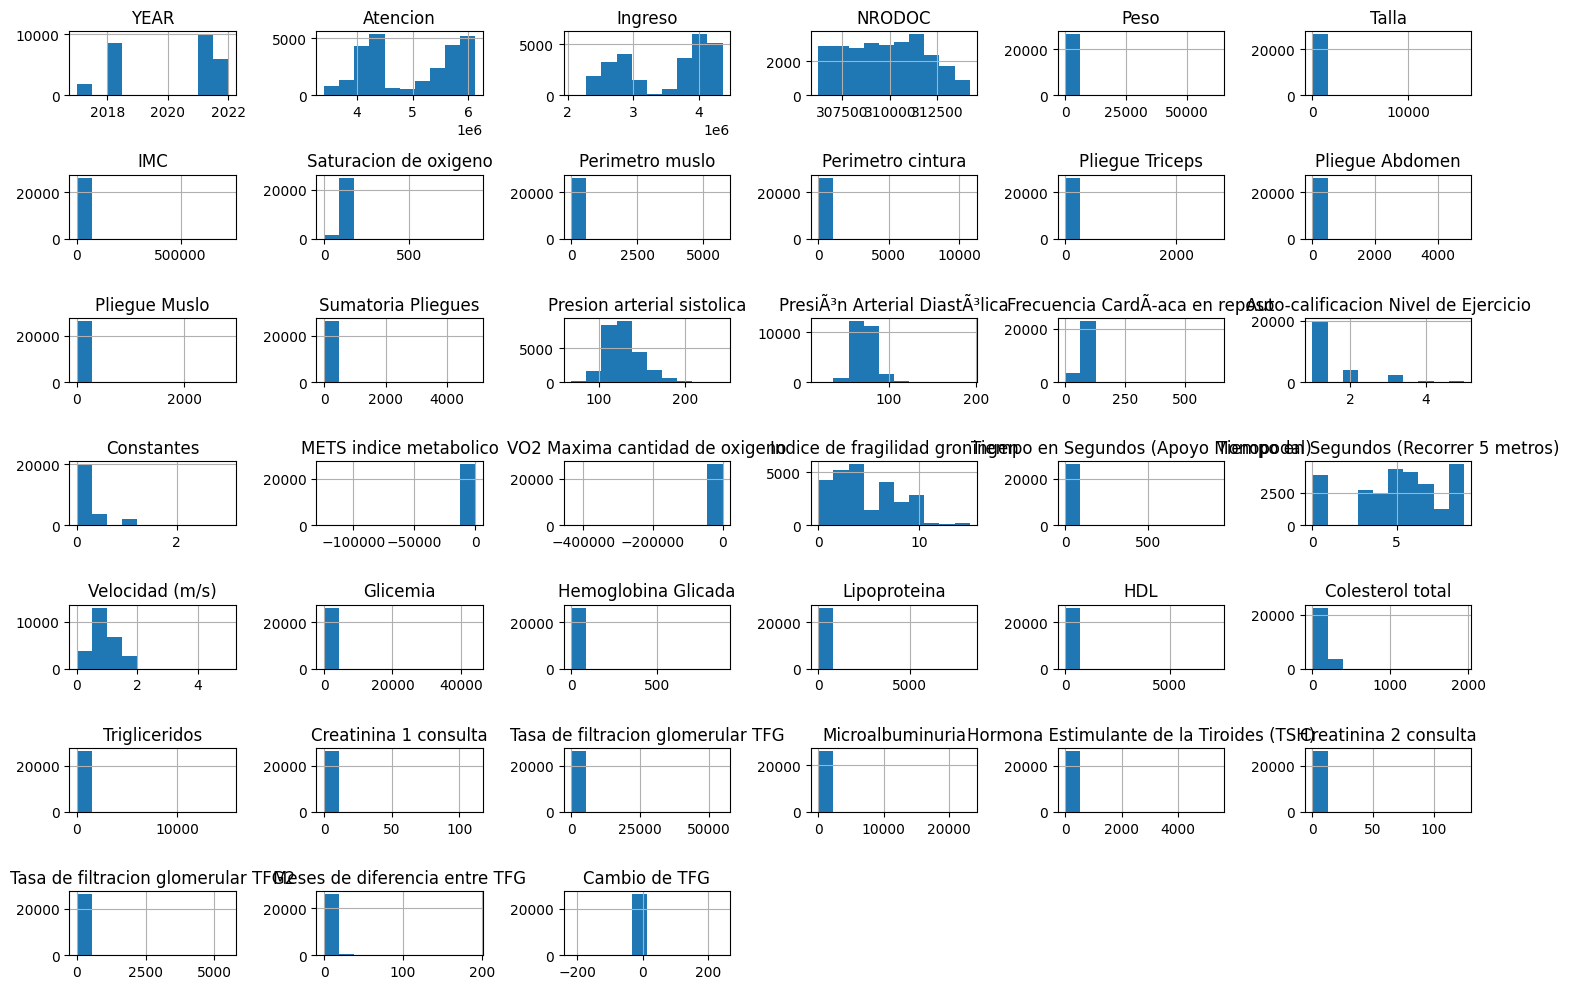

In [ ]:
#Distribución de Variables Numéricas
df_cronicos60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
#Distribución de Variables Categóricas: Conteo de valores únicos para variables categóricas
for column in df_cronicos60.select_dtypes(include=['object']).columns:
    print(df_cronicos60[column].value_counts())

MES
MARZO         3152
FEBRERO       2867
DICIEMBRE     2612
MAYO          2543
OCTUBRE       2452
NOVIEMBRE     2337
ENERO         2082
AGOSTO        1984
JULIO         1643
SEPTIEMBRE    1594
ABRIL         1557
JUNIO         1499
Name: count, dtype: int64
Fecha diligenciamiento
27/10/2021    88
28/10/2021    85
23/03/2022    83
6/12/2021     81
14/02/2022    80
              ..
17/10/2021     1
9/01/2022      1
2/01/2022      1
28/11/2021     1
29/05/2022     1
Name: count, Length: 764, dtype: int64
Hora
11:12:08 a.m.     357
1:19:15 p.m.        5
11:38:59 a.m.       5
10:46:31 a.m.       5
9:26:49 a. m.       4
                 ... 
12:01:18 p. m.      1
11:53:48 a. m.      1
11:19:30 a. m.      1
11:14:37 a. m.      1
11:25:39 p.m.       1
Name: count, Length: 22441, dtype: int64
Tipo
CC    26311
CE       11
Name: count, dtype: int64
Clasificacion IMC
Sobrepeso         10046
Obesidad Grasa     8369
Normal             7400
Bajo                507
Name: count, dtype: int64
Calificaci

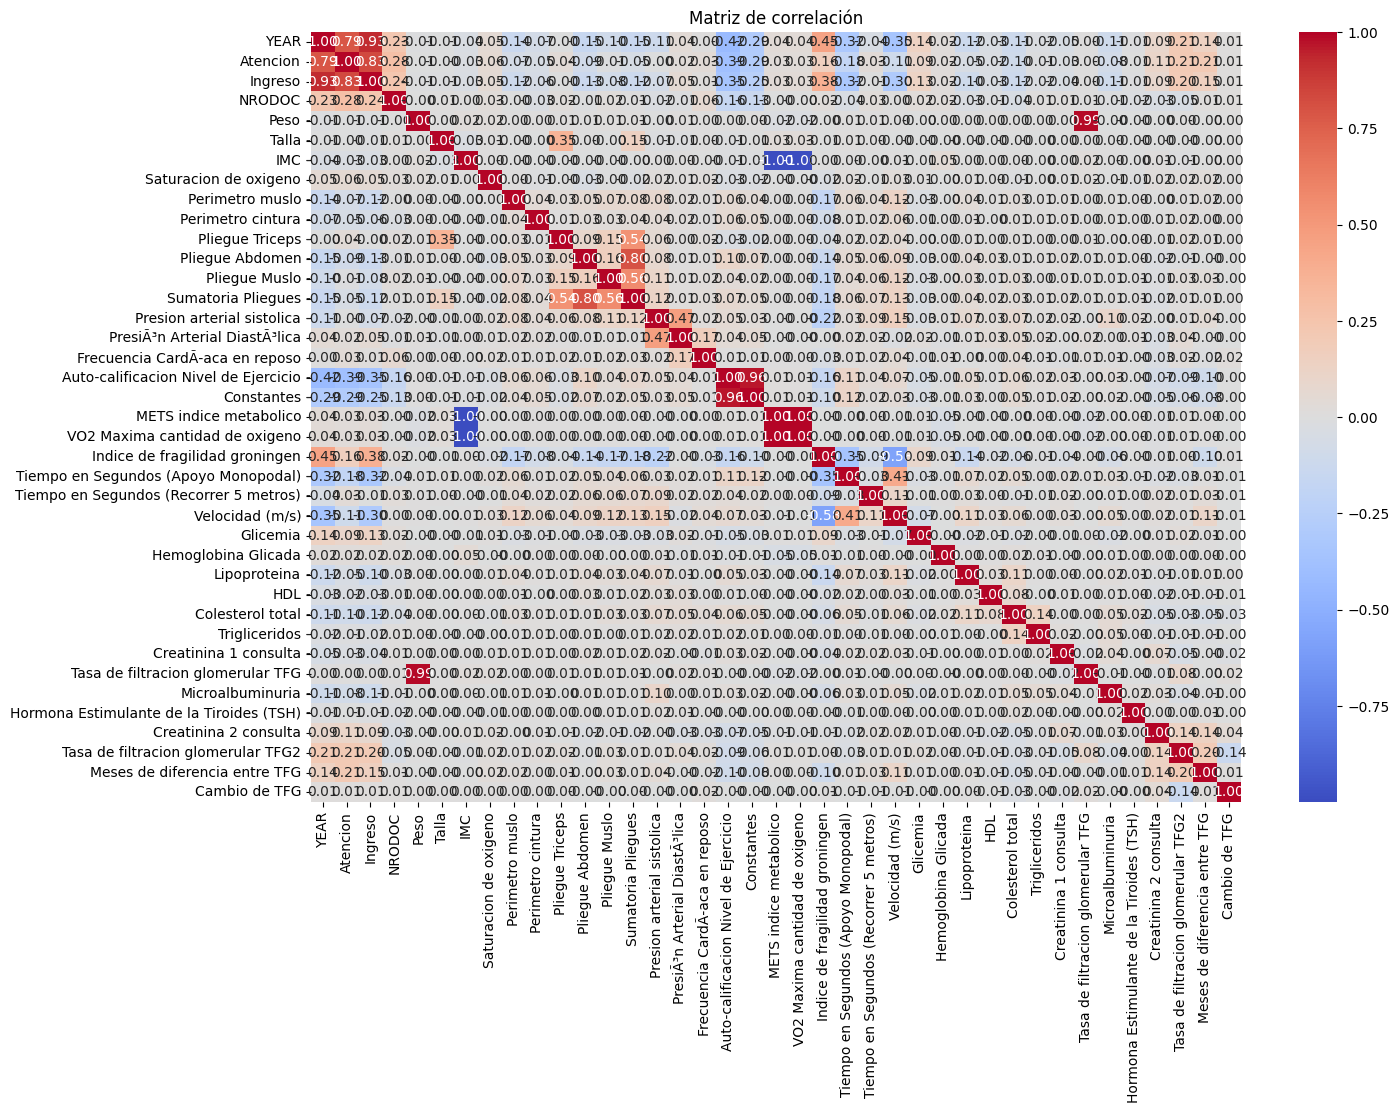

In [ ]:
#Correlación entre Variables: Matriz de correlación para variables numéricas.
# Seleccionar solo las columnas numéricas
numeric_cols = df_cronicos60.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_cronicos60[numeric_cols].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

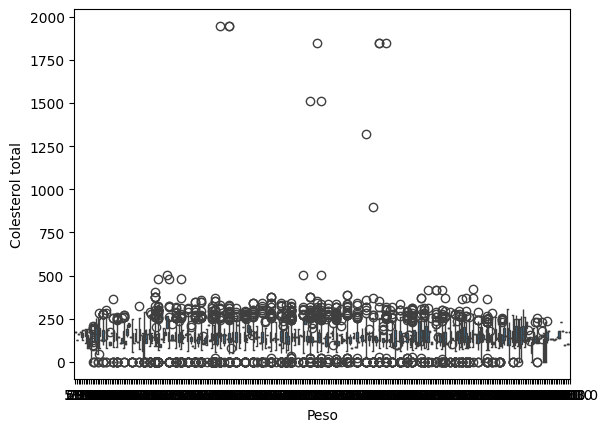

In [ ]:
#Comparación entre Grupos
sns.boxplot(x='Peso', y='Colesterol total', data=df_cronicos60)
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


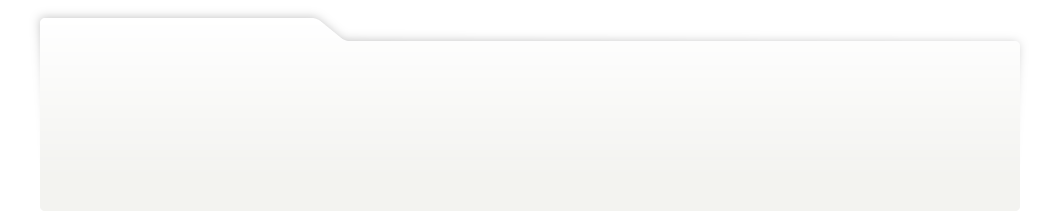
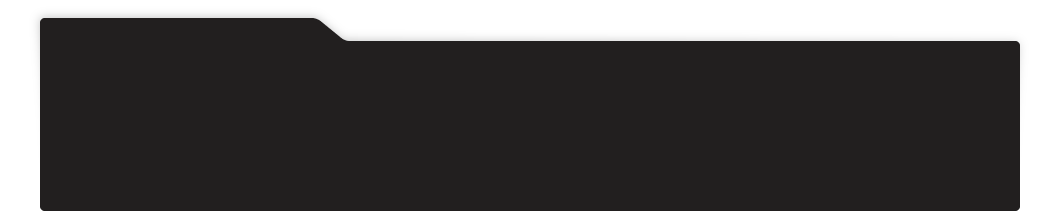
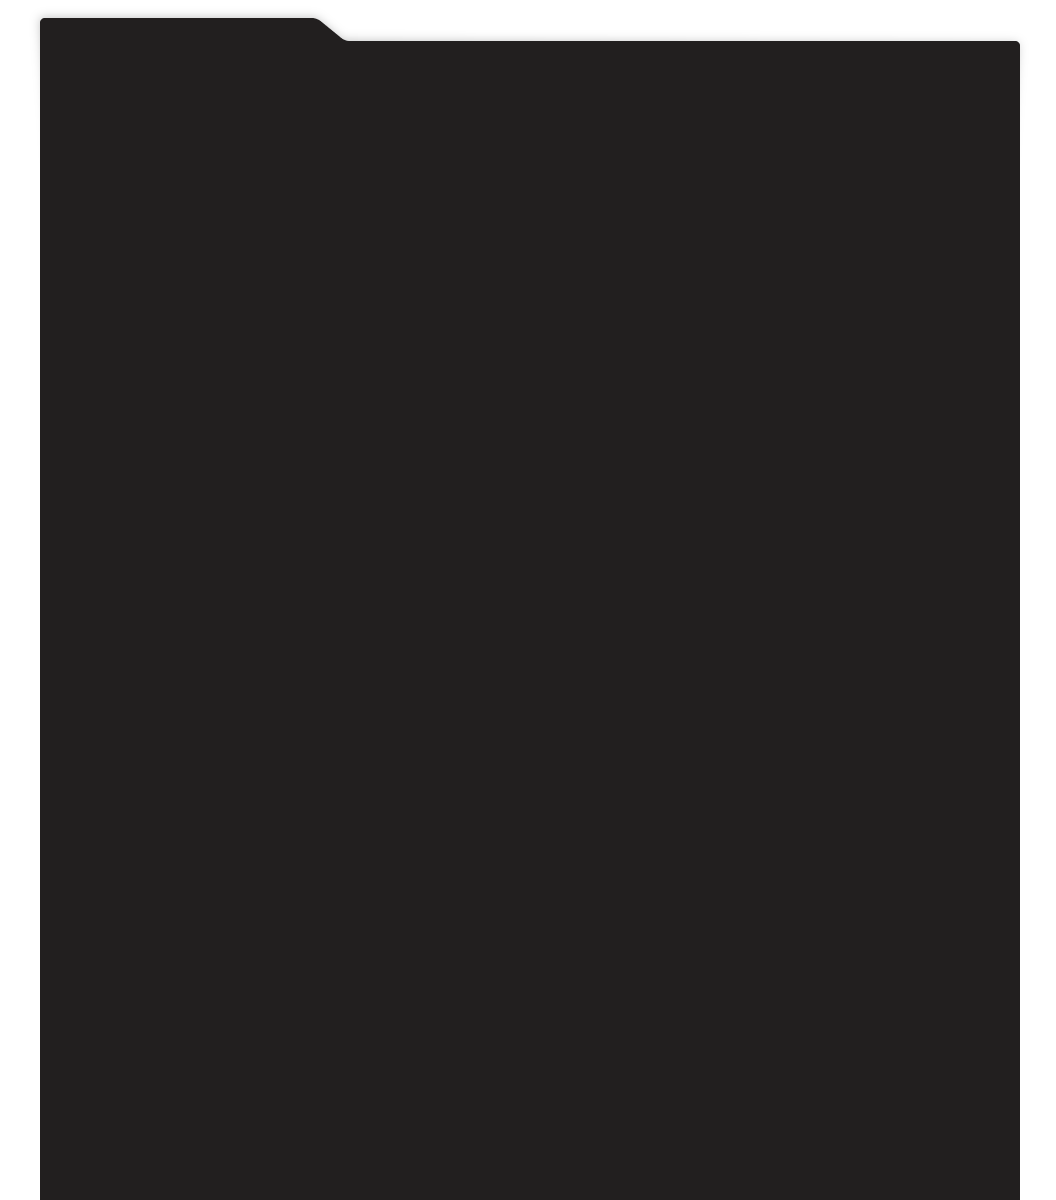
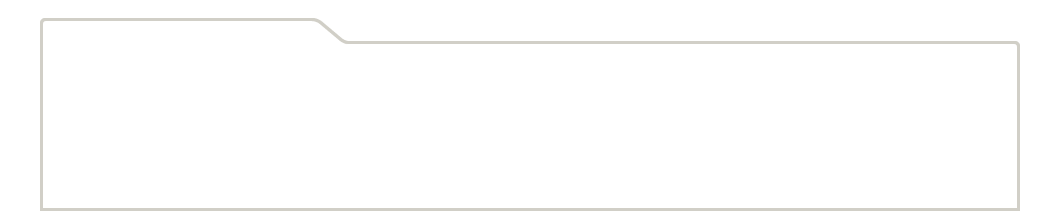
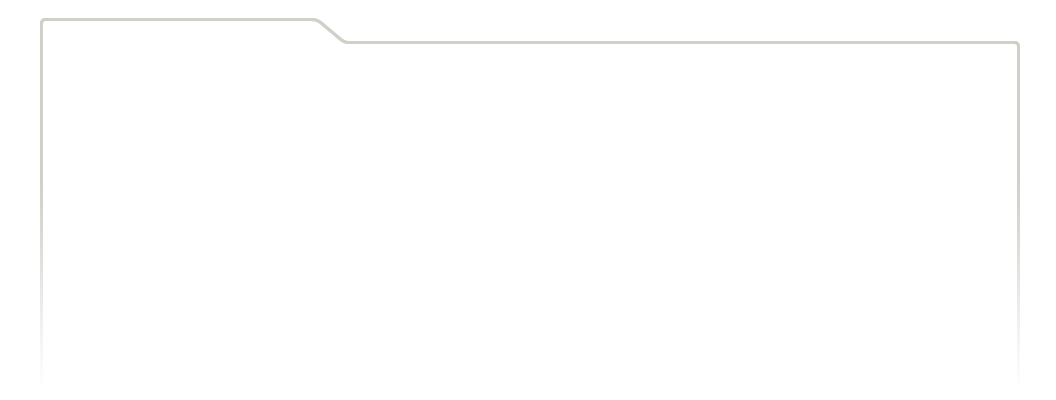
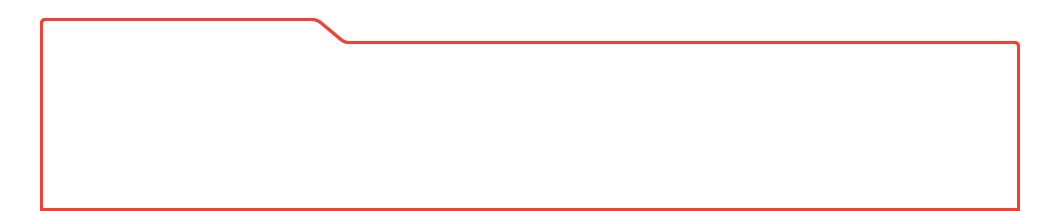
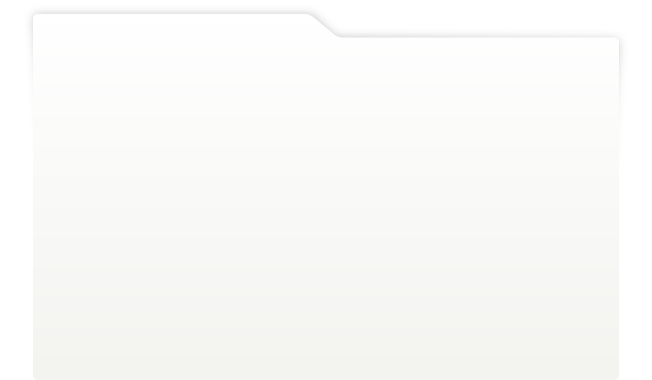
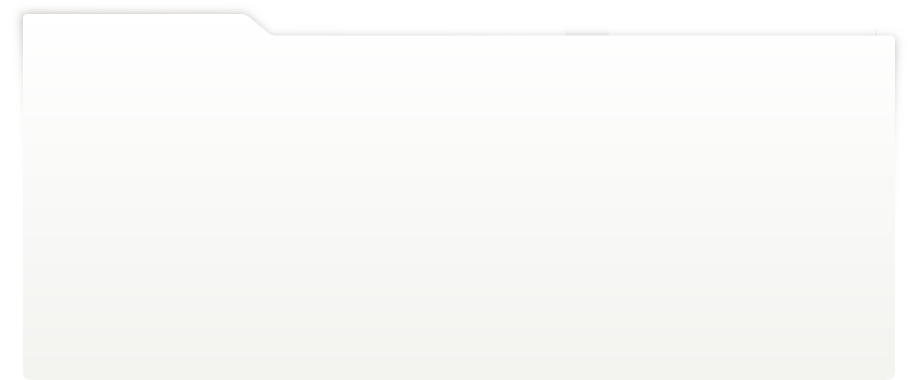
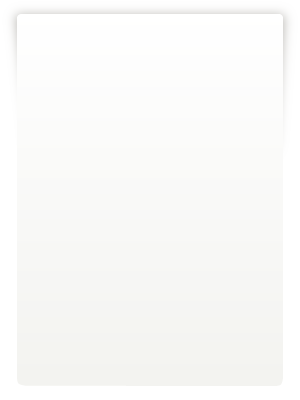
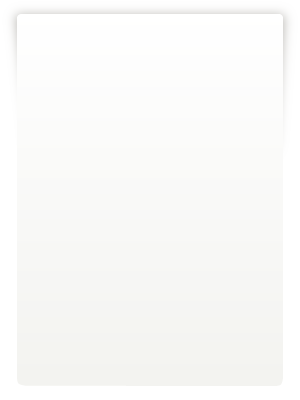
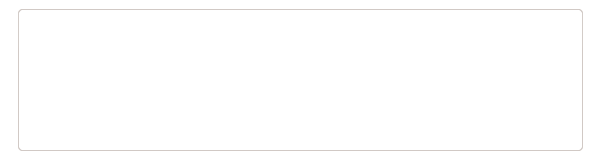
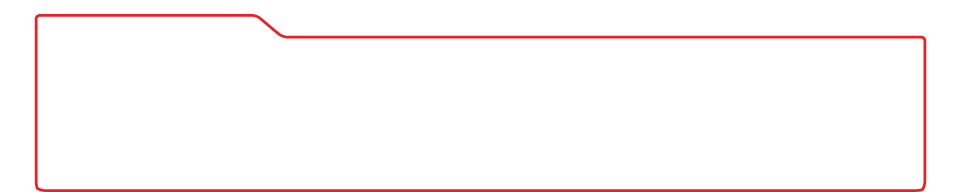
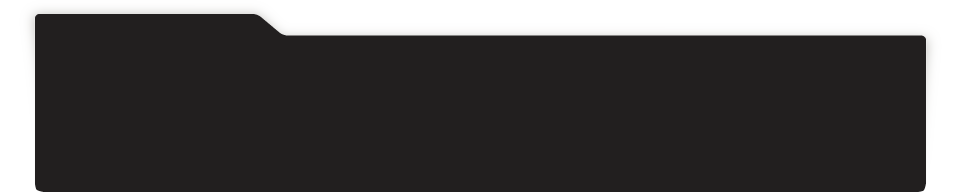
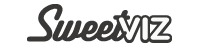
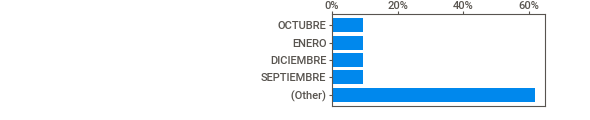
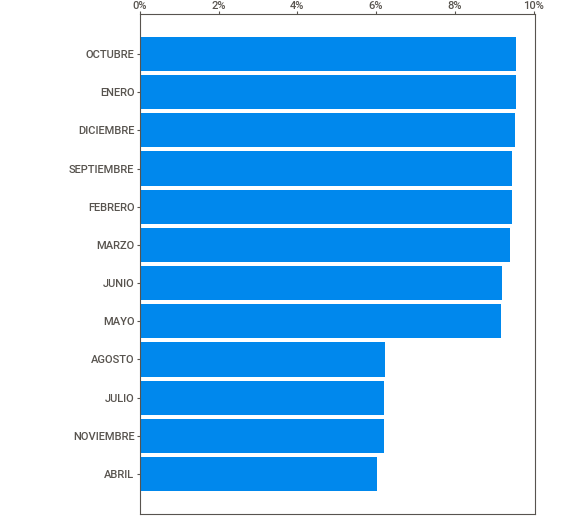
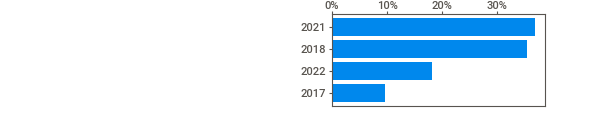
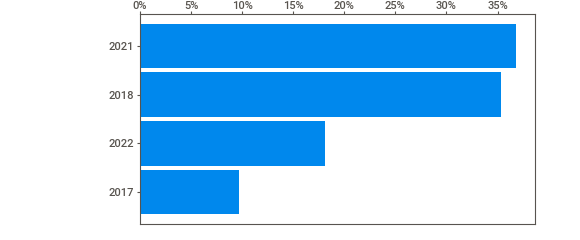
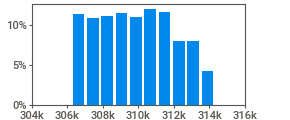
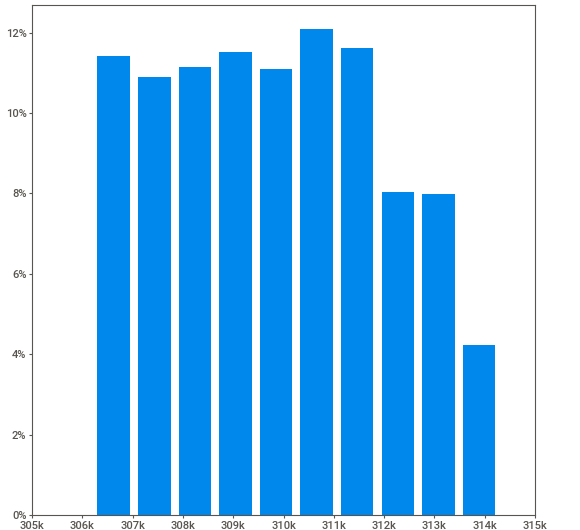
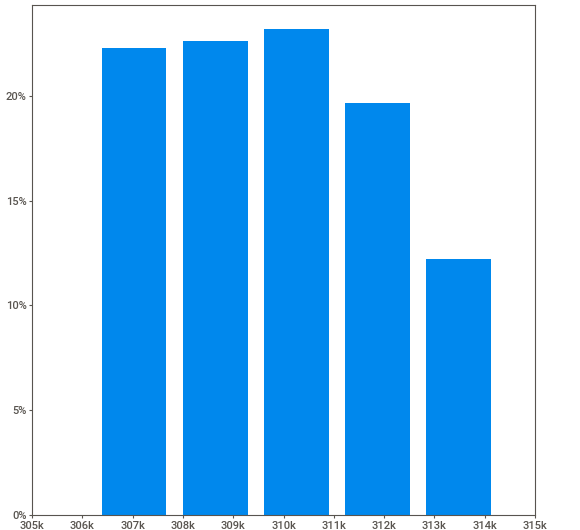
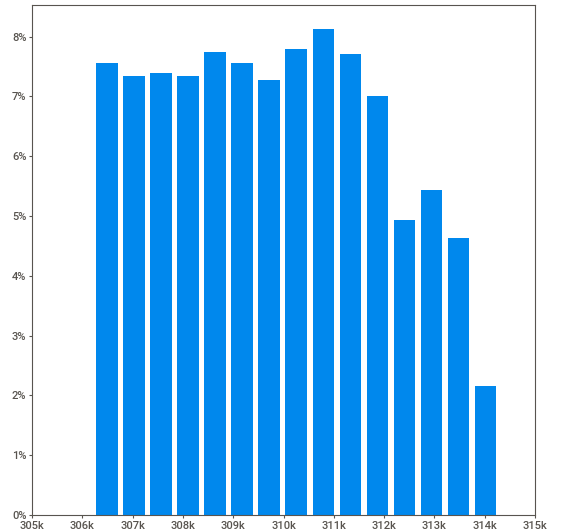
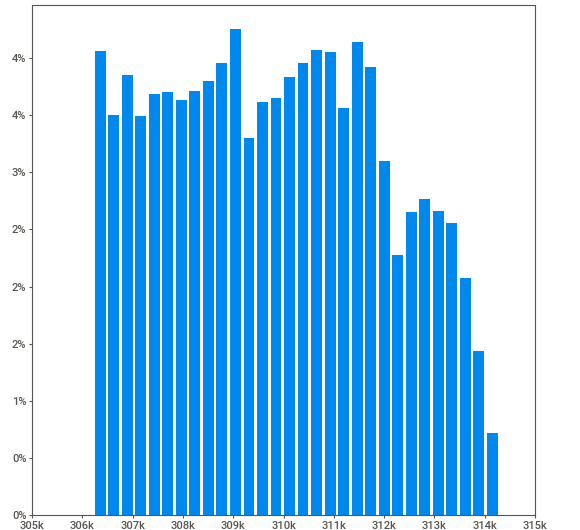
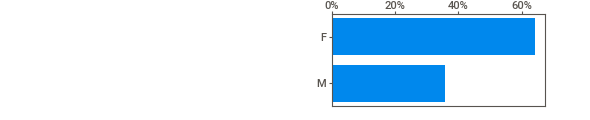
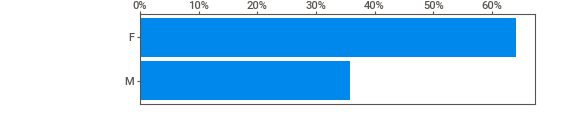
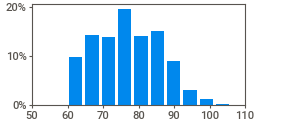
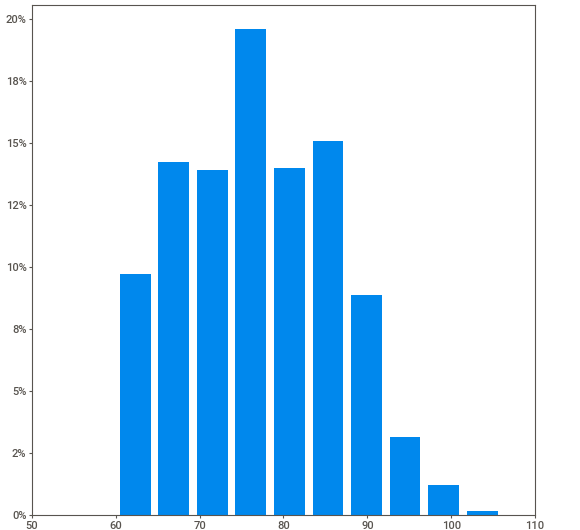
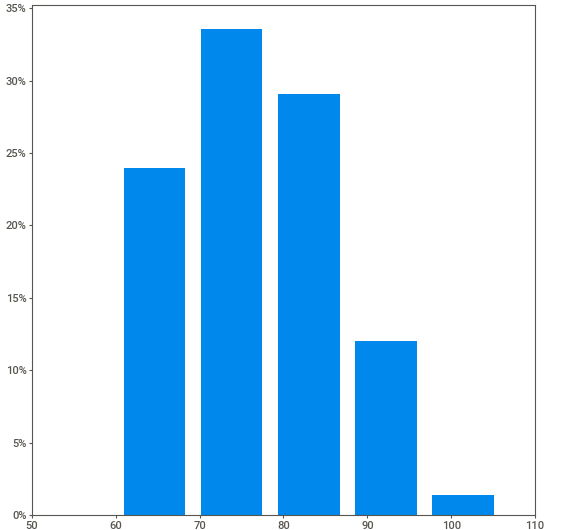
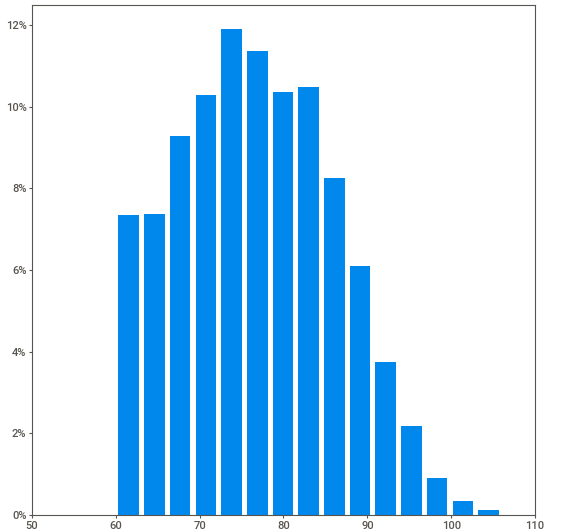
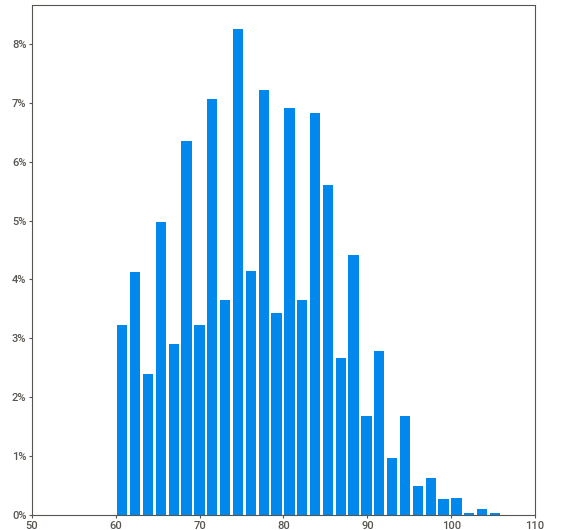
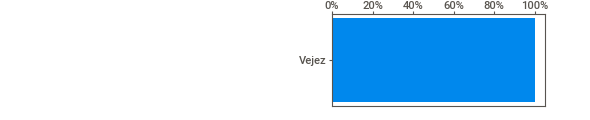
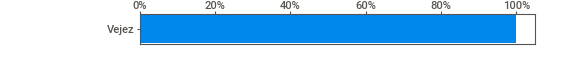
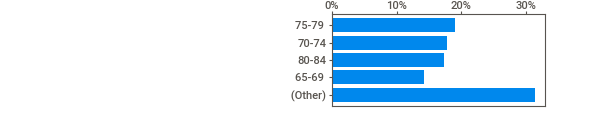
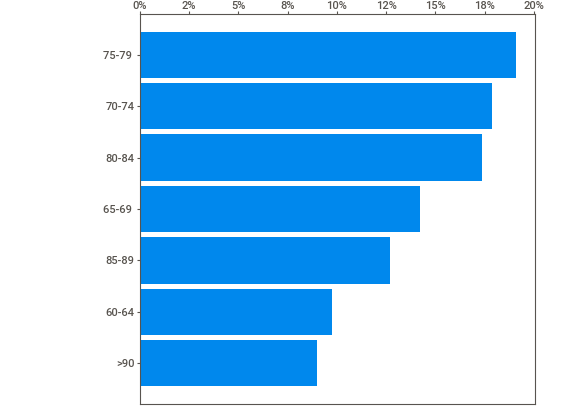
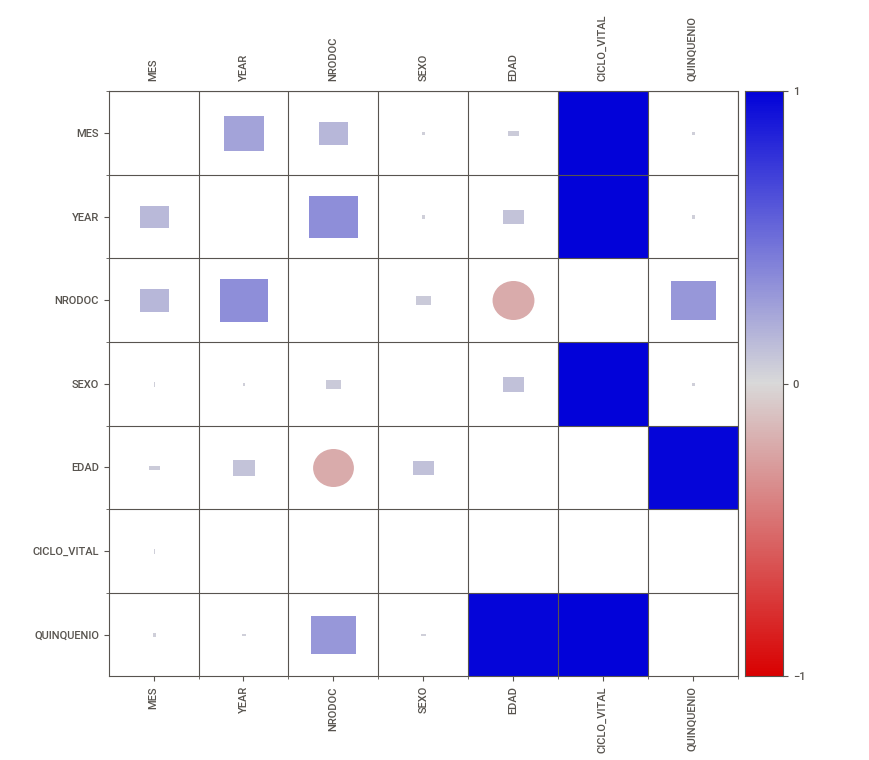
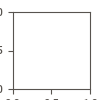

In [ ]:
#ahora haremos una exploración rapida de las variables del df df_usuarios60
rgd = sv.analyze(df_usuarios60)
rgd.show_notebook()


                                             |          | [  0%]   00:00 -> (? left)


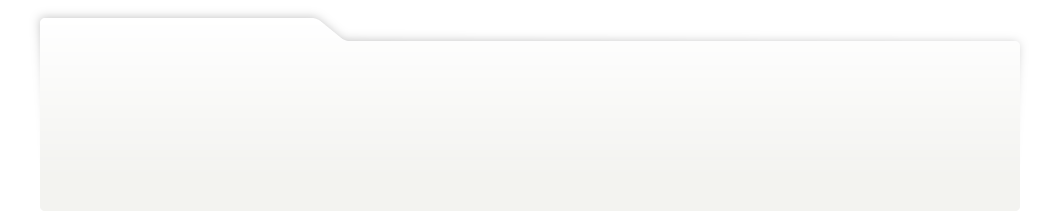
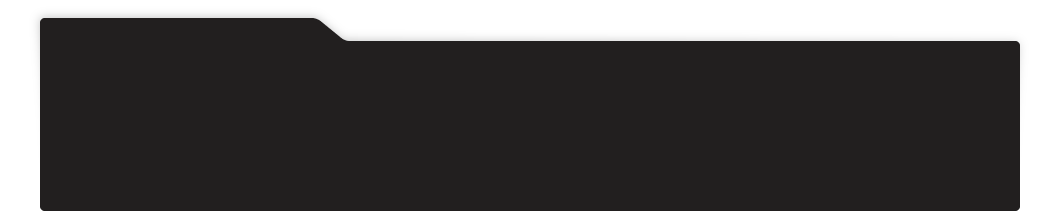
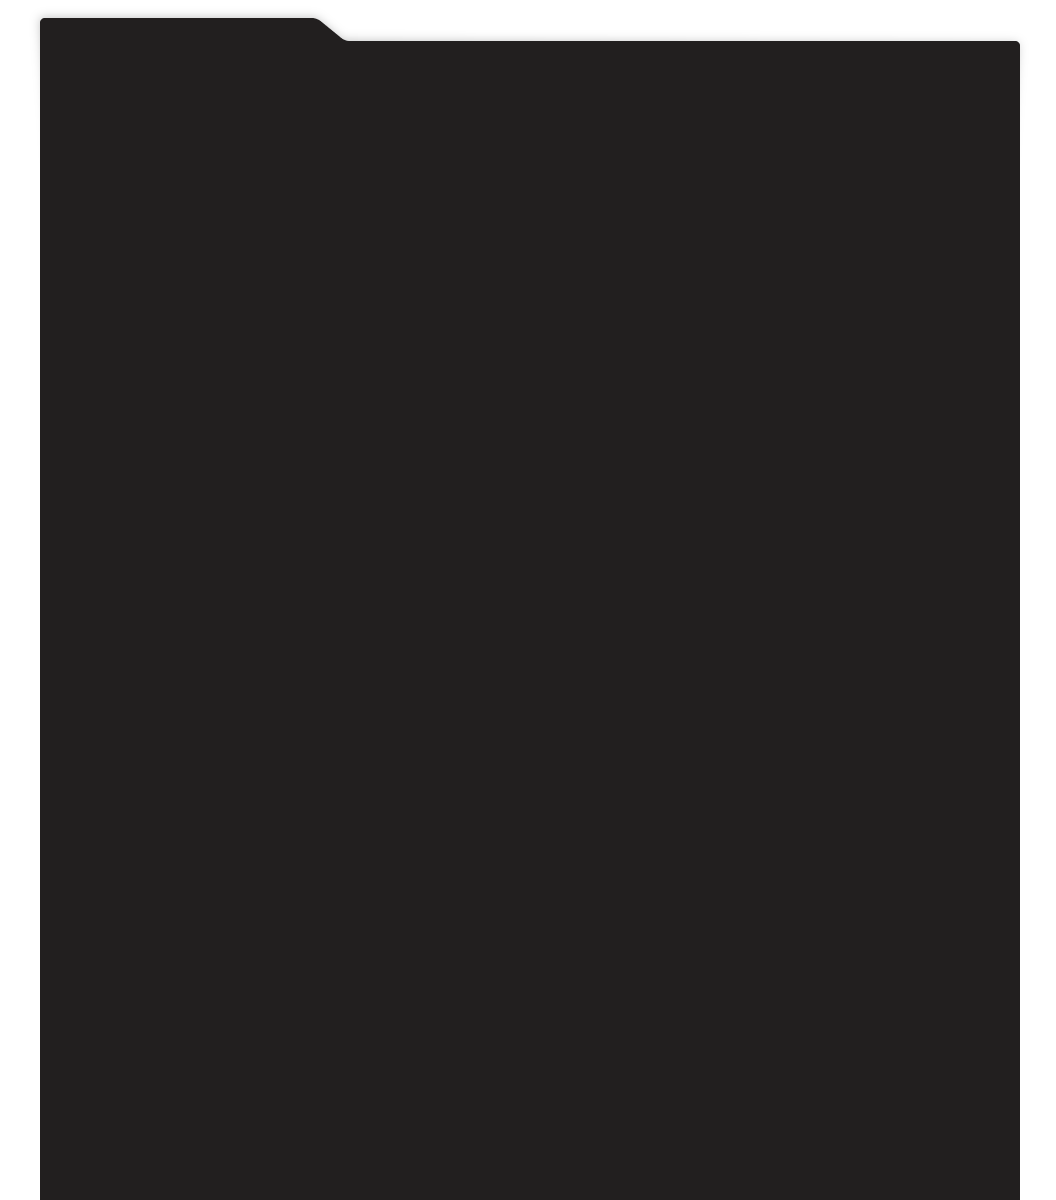
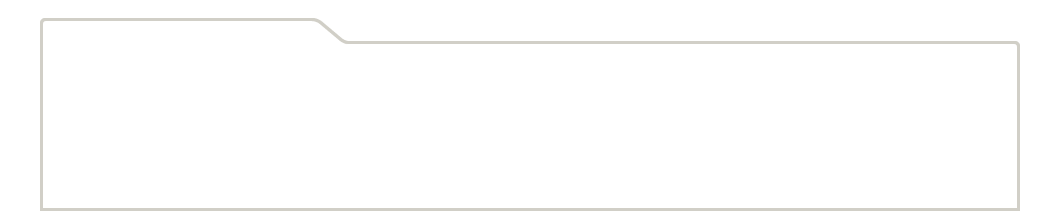
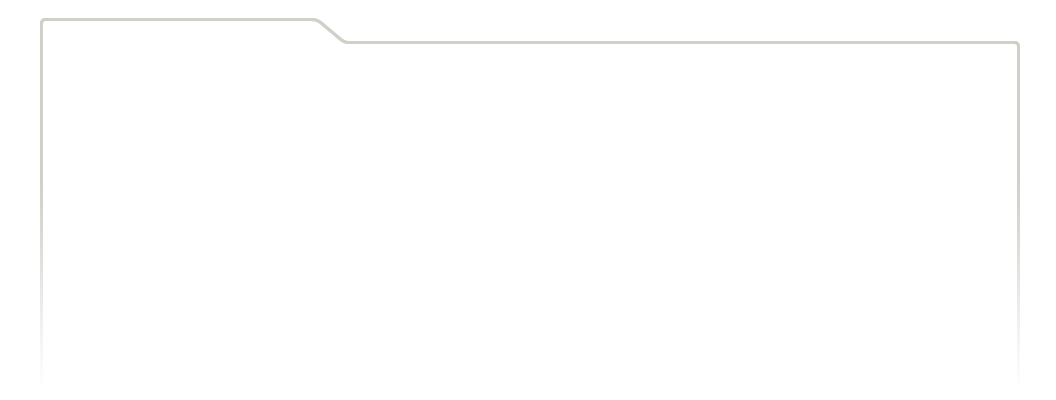
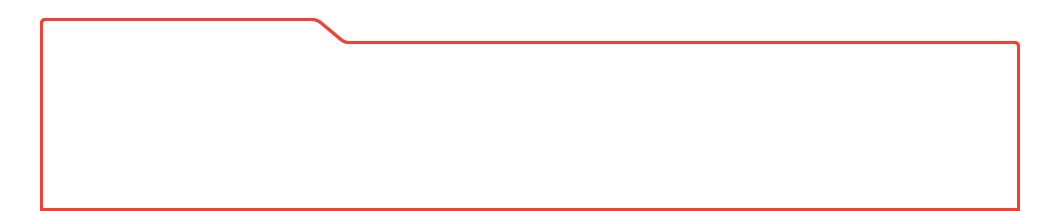
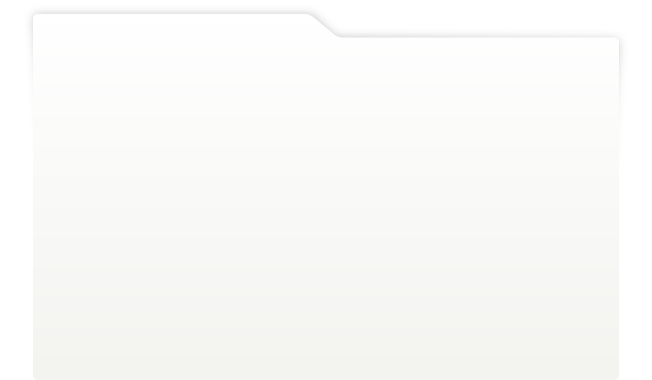
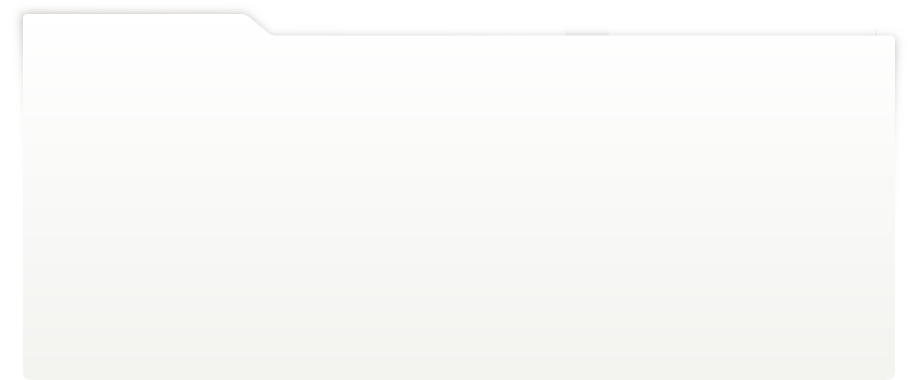
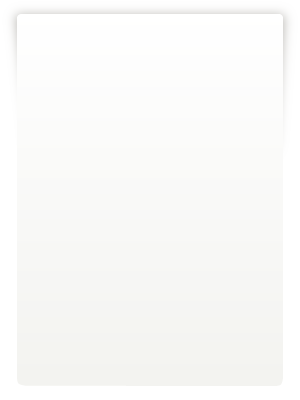
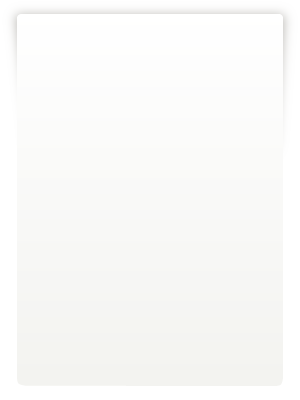
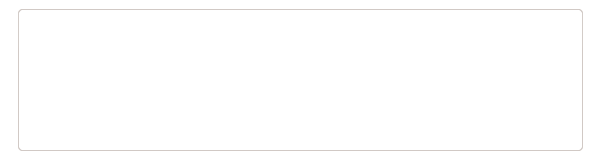
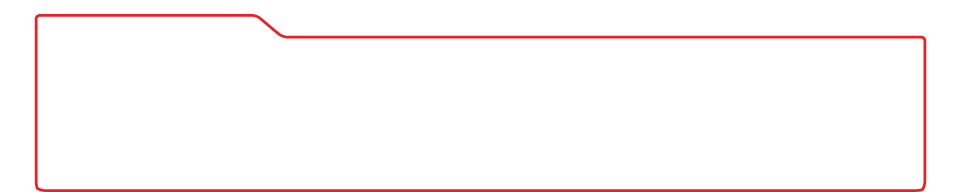
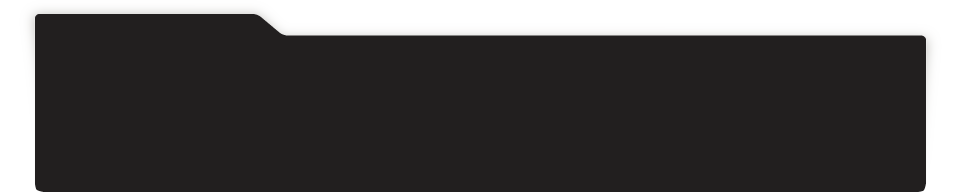
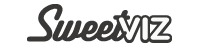
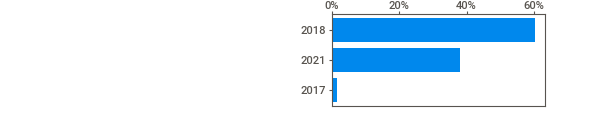
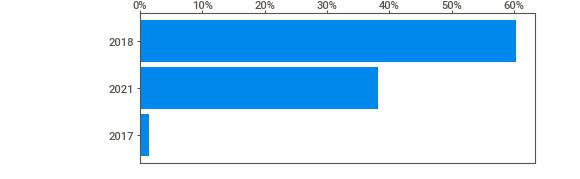
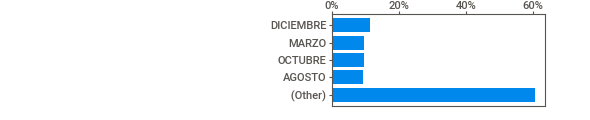
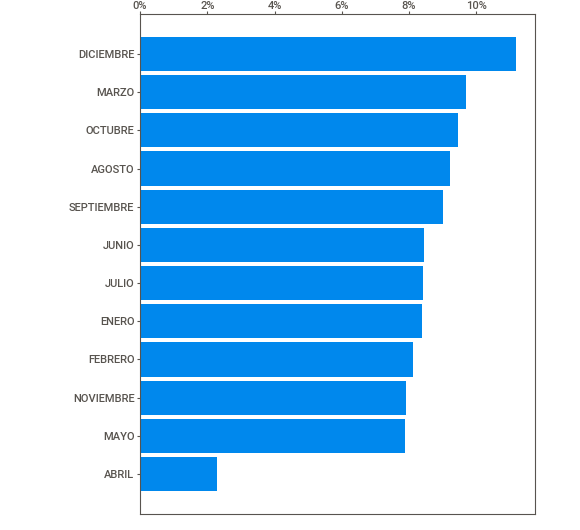
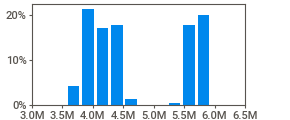
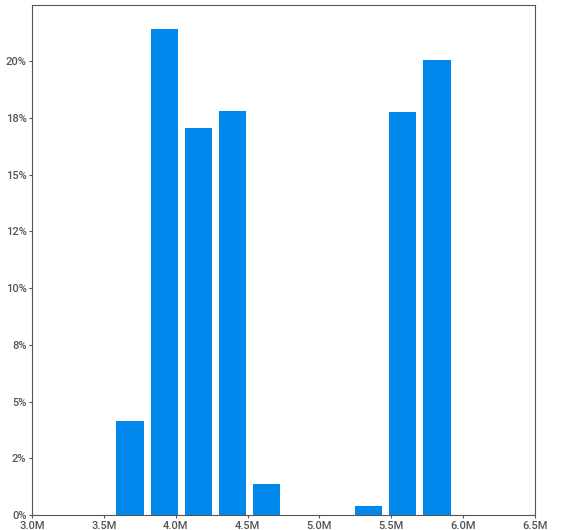
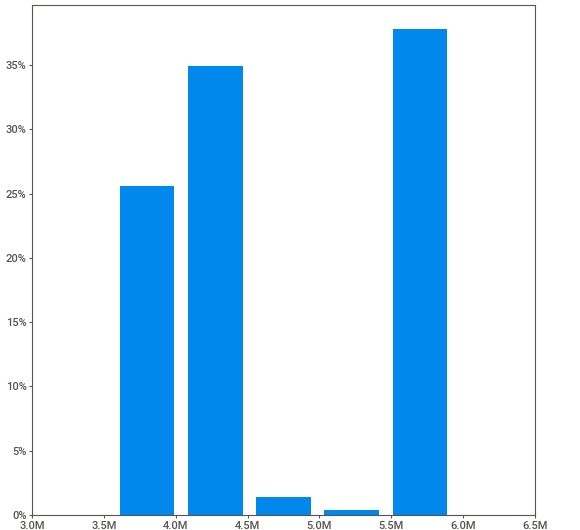
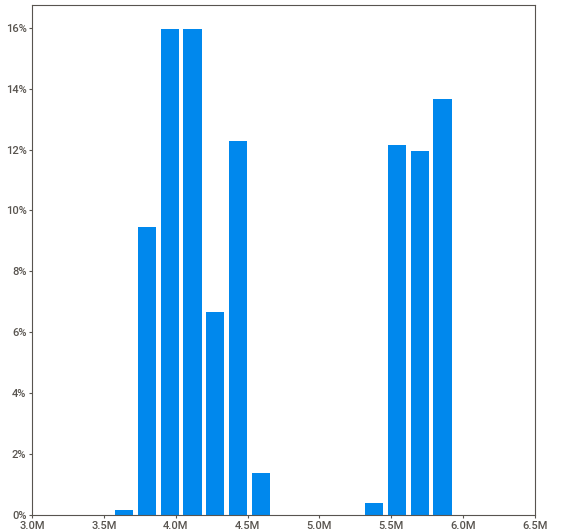
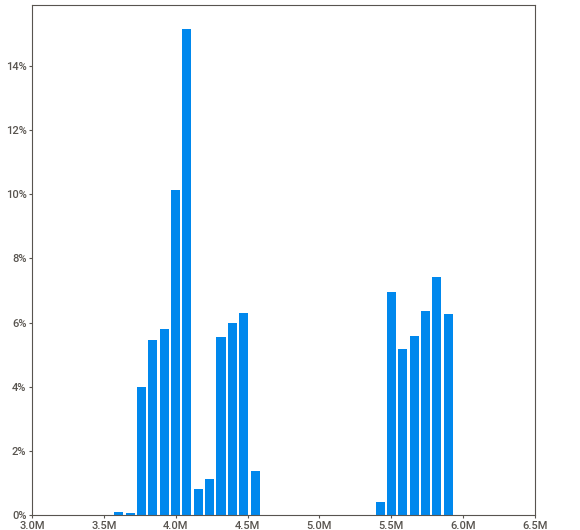
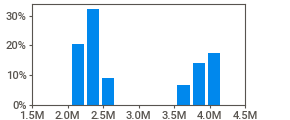
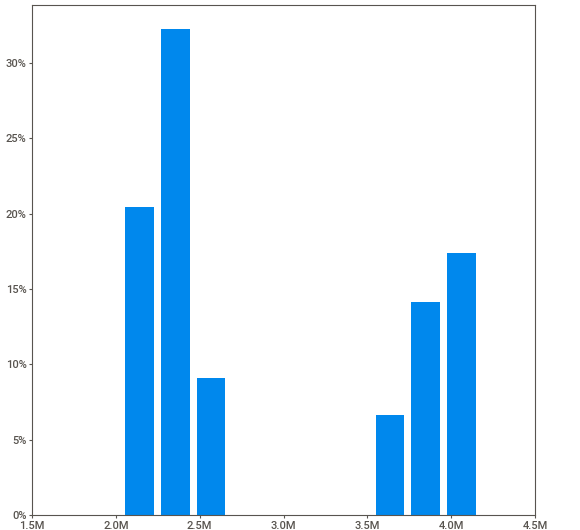
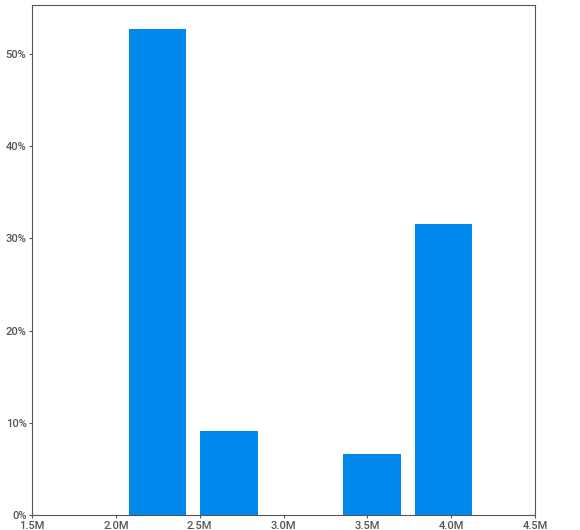
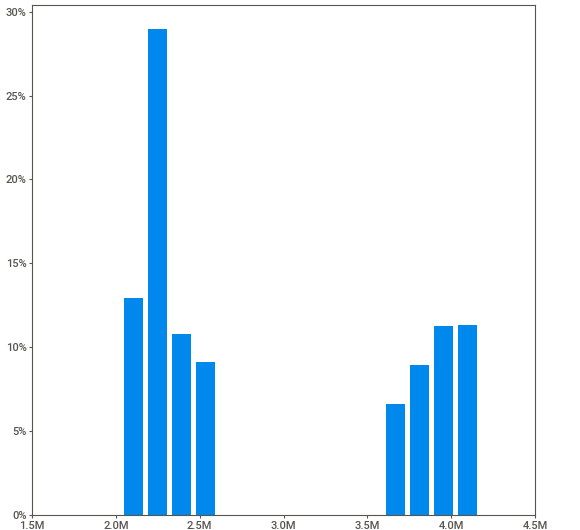
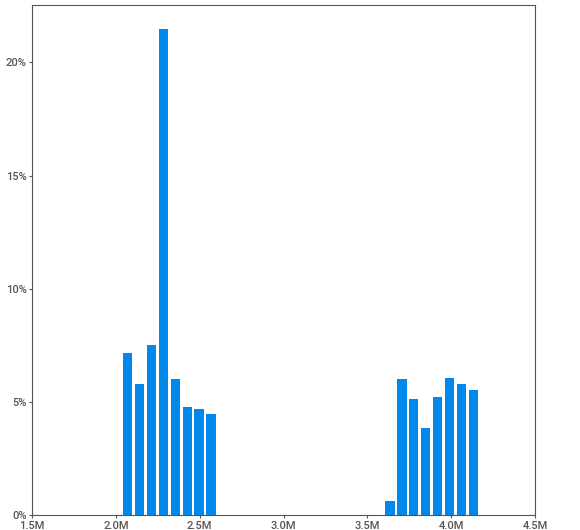
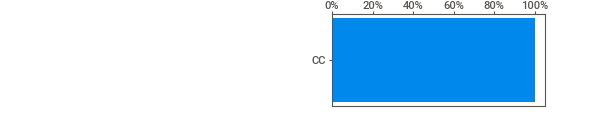
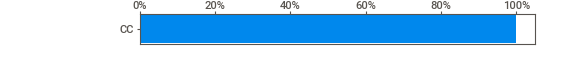
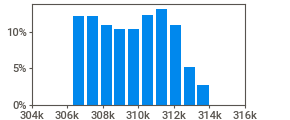
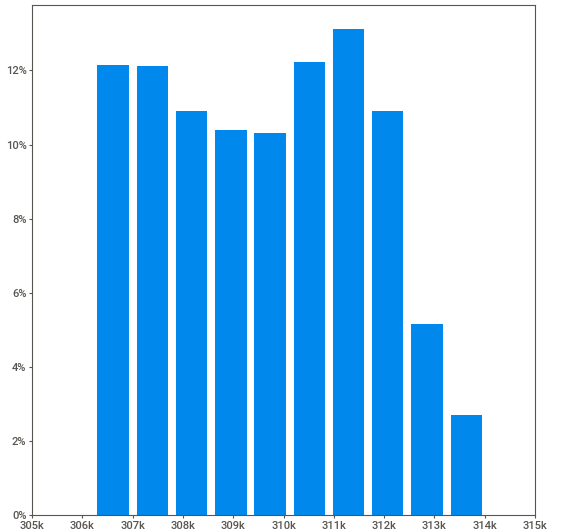
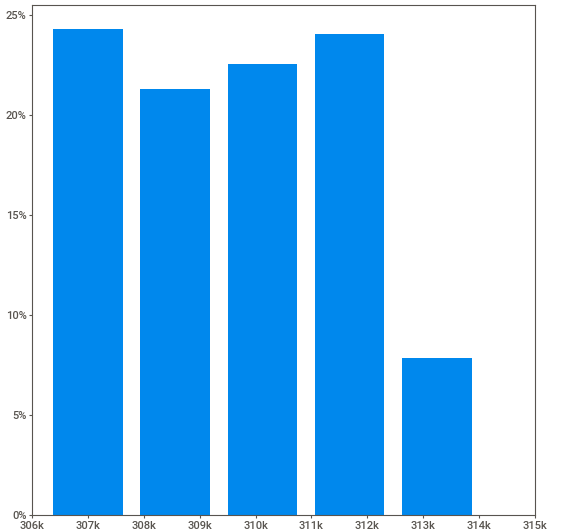
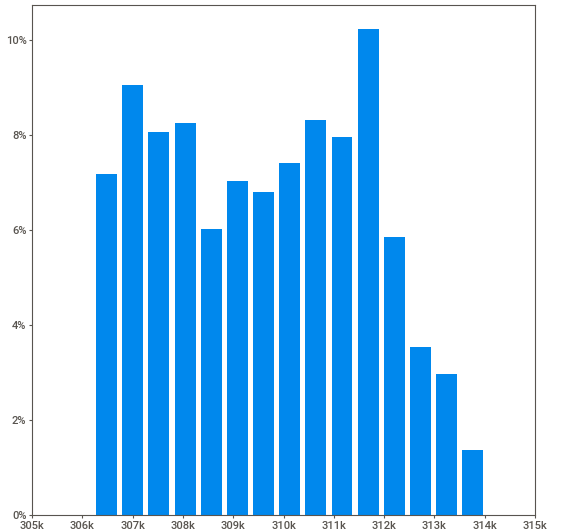
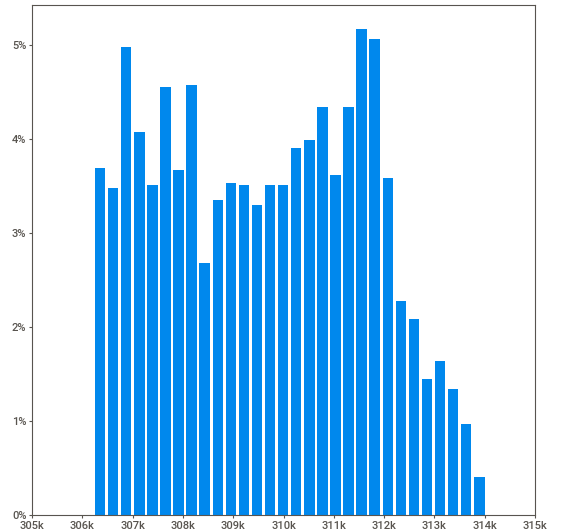
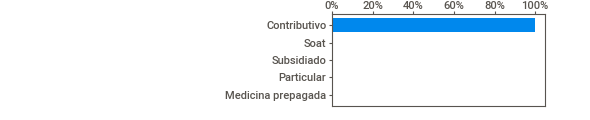
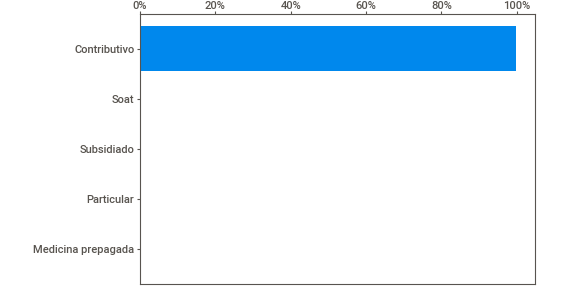
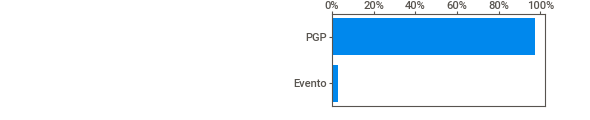
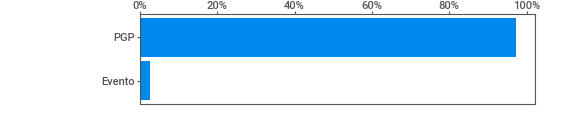
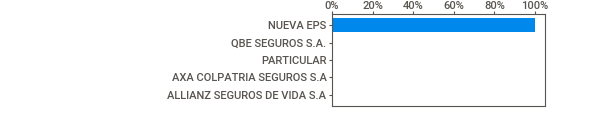
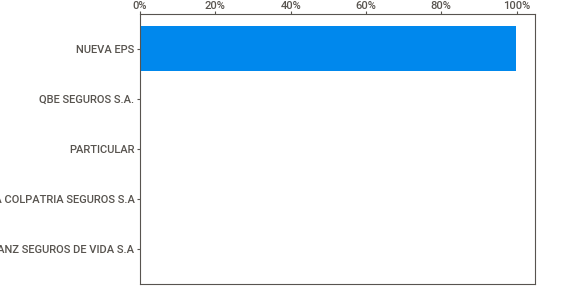
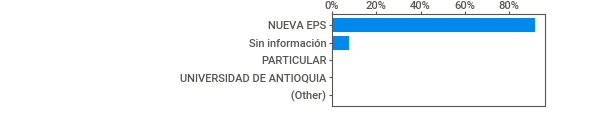
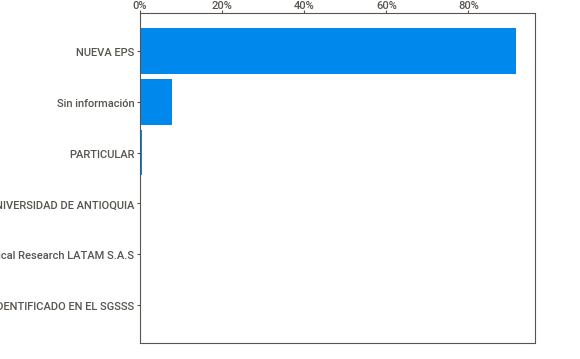
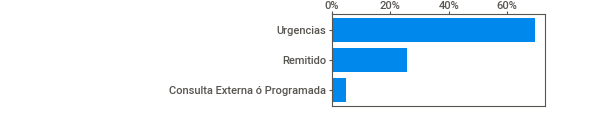
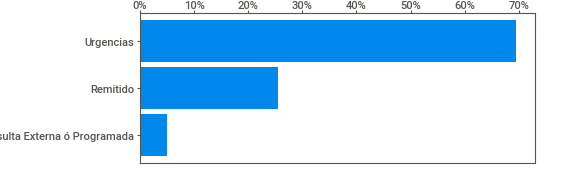
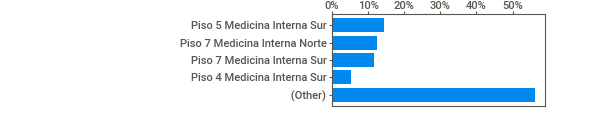
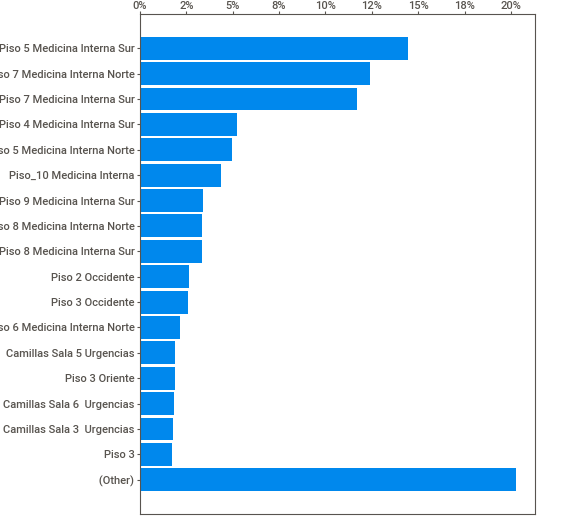
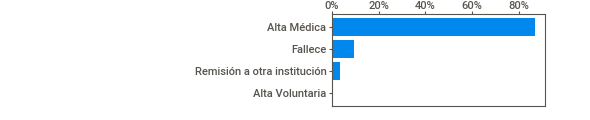
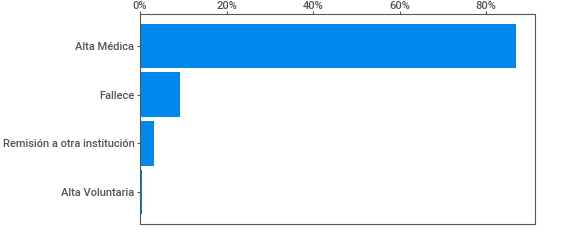
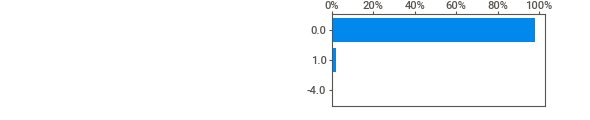
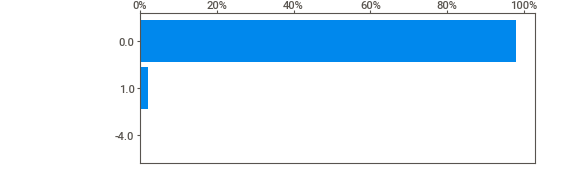
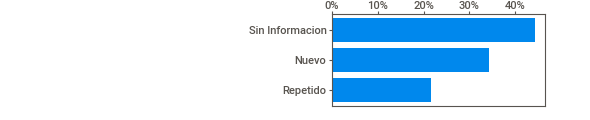
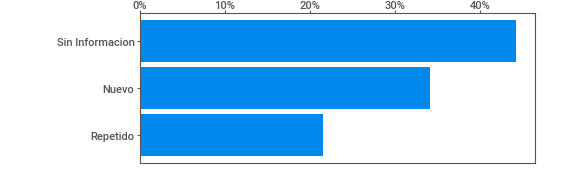
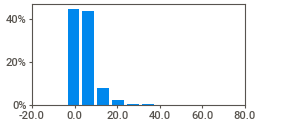
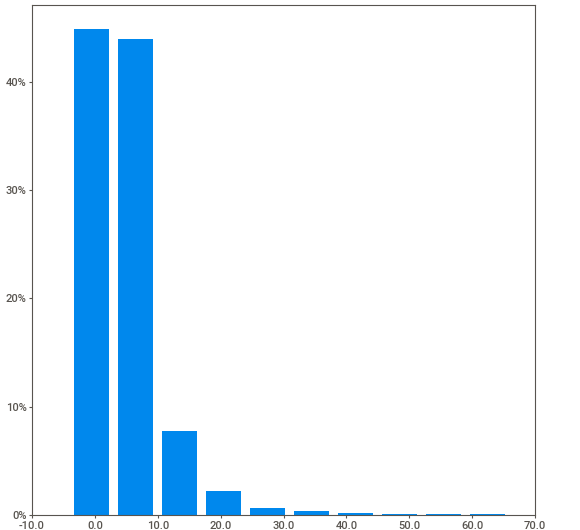
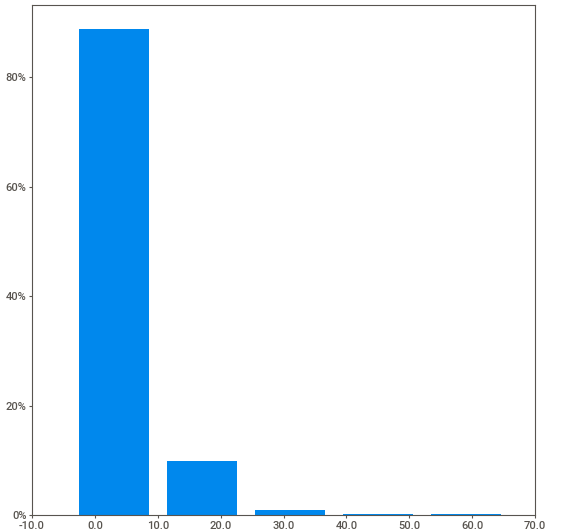
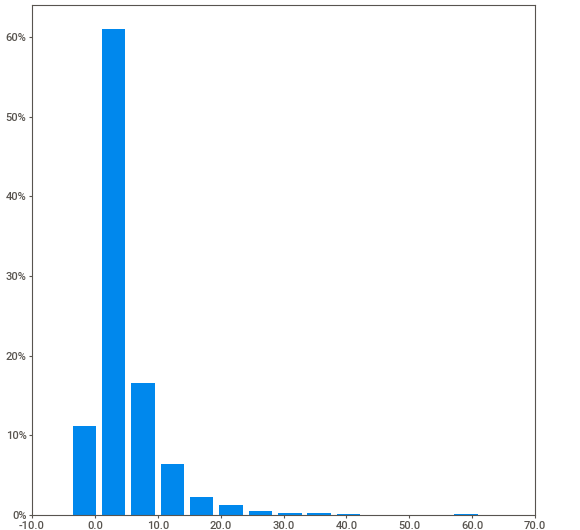
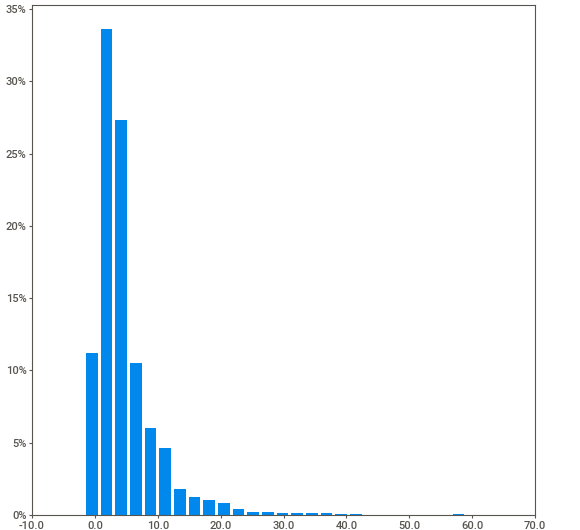
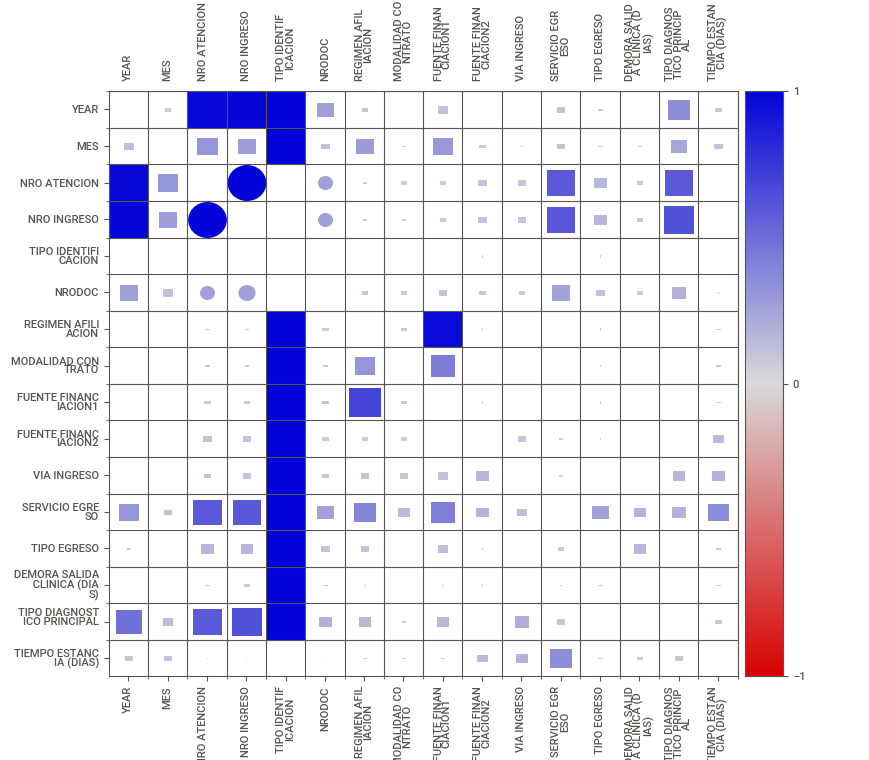
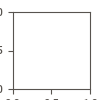

In [ ]:
#ahora haremos una exploración rapida de las variables del df df_egresos60
rgd = sv.analyze(df_egresos60)
rgd.show_notebook()

Con esta exploración inicial podemos hacer un par de conclusiones rapidas


mas del 90% de los eventos son PGP
la via de ingreso mas popular es urgencias con alredededor del 65% de ingreso.
mas del 85% de los egresos son por alta medica.
Alrededor del 22% de los diagnosticos son repetidos, por lo tanto se concluye que son re ingresos.
La estancia promedio esta alrededor de los 4.6 dias.

In [29]:
#reviamos nuevamente que hay en cada df para saber como tratar las variables que nos quedan
df_usuarios60.head()

MES  YEAR  NRODOC SEXO  EDAD CICLO_VITAL QUINQUENIO
24410  SEPTIEMBRE  2017  307559    M  68.0       Vejez     65-69 
24412  SEPTIEMBRE  2017  307242    M  69.0       Vejez     65-69 
24418  SEPTIEMBRE  2017  310364    M  66.0       Vejez     65-69 
24424  SEPTIEMBRE  2017  309778    M  60.0       Vejez      60-64
24425  SEPTIEMBRE  2017  309779    M  82.0       Vejez      80-84

In [78]:
df_egresos60.head()

YEAR        MES  NRO ATENCION  NRO INGRESO TIPO IDENTIFICACION  NRODOC  \
2  2018    FEBRERO       3912821      2159592                  CC  308185   
3  2018       MAYO       4023613      2254075                  CC  308185   
4  2018      JULIO       4080166      2292863                  CC  308185   
5  2018    OCTUBRE       4388863      2434070                  CC  308185   
6  2018  NOVIEMBRE       4448455      2494057                  CC  308185   

  FECHA NACIMIENTO REGIMEN AFILIACION MODALIDAD CONTRATO FUENTE FINANCIACION1  \
2       1937-07-18       Contributivo                PGP            NUEVA EPS   
3       1937-07-18       Contributivo                PGP            NUEVA EPS   
4       1937-07-18       Contributivo                PGP            NUEVA EPS   
5       1937-07-18       Contributivo                PGP            NUEVA EPS   
6       1937-07-18       Contributivo                PGP            NUEVA EPS   

  FUENTE FINANCIACION2 VIA INGRESO              SERVICIO EGRESO  TIPO EGRESO  \
2            NUEVA EPS   Urgencias                 Fast track 1  Alta Médica   
3            NUEVA EPS   Urgencias                        ERA 1  Alta Médica   
4            NUEVA EPS   Urgencias  Piso 7 Medicina Interna Sur  Alta Médica   
5            NUEVA EPS   Urgencias  Piso 4 Medicina Interna Sur  Alta Médica   
6            NUEVA EPS   Urgencias                        ERA 1  Alta Médica   

     FECHA INGRESO CLINICA  FECHA INGRESO SERVICIO        FECHA SALIDA  \
2  2018-02-21 05:21:03.340 2018-02-21 05:21:03.340 2018-02-22 13:21:18   
3  2018-05-19 15:07:11.027 2018-05-19 15:07:11.027 2018-05-20 16:14:41   
4  2018-07-26 12:44:55.287 2018-07-26 18:37:02.957 2018-07-31 14:40:30   
5  2018-10-21 20:04:59.030 2018-10-22 07:54:44.830 2018-10-27 14:58:20   
6  2018-11-20 02:01:23.783 2018-11-20 10:28:34.303 2018-11-22 09:22:53   

   DEMORA SALIDA CLINICA (DIAS) TIPO DIAGNOSTICO PRINCIPAL  \
2                           0.0                   Repetido   
3                           0.0            Sin Informacion   
4                           0.0            Sin Informacion   
5                           0.0            Sin Informacion   
6                           0.0            Sin Informacion   

   TIEMPO ESTANCIA (DIAS)  
2                       1  
3                       1  
4                       4  
5                       5  
6                       1

In [36]:
df_cronicos60.head()

YEAR      MES Fecha diligenciamiento           Hora  AtenciÃ³n  Ingreso  \
0  2017  OCTUBRE              2/10/2017  9:00:20 a. m.    3912499  2629714   
1  2017  OCTUBRE              2/10/2017  9:04:33 a. m.    3942247  2629726   
2  2017  OCTUBRE              2/10/2017  9:11:43 a. m.    3898560  2629751   
3  2017  OCTUBRE              2/10/2017  9:33:34 a. m.    3912599  2629828   
4  2017  OCTUBRE              2/10/2017  9:43:59 a. m.    3906820  2629717   

  Tipo  NRODOC  Peso  Talla  ...  Hormona Estimulante de la Tiroides (TSH)  \
0   CC  311144  69.0  155.0  ...                                      5.05   
1   CC  308418  62.0  155.0  ...                                      4.65   
2   CC  308573  89.0  163.0  ...                                      5.41   
3   CC  307549  88.0  163.0  ...                                     13.73   
4   CC  307044  58.0  158.0  ...                                      0.00   

      Clase Funcional  Creatinina 2 consulta  \
0  Clase funcional 2B                    0.0   
1  Clase funcional 2A                    0.0   
2  Clase funcional 2B                    0.0   
3  Clase funcional 2B                    0.0   
4   Clase funcional 3                    0.0   

   Tasa de FiltraciÃ³n Glomerular TFG2  Meses de diferencia entre TFG  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   Cambio de TFG  Ãlcera de pie diabÃ©tico  RemisiÃ³n  \
0            0.0                         No   Grupal 2   
1            0.0                         No   Grupal 2   
2            0.0                         No   Grupal 2   
3            0.0                         No   Grupal 2   
4            0.0                         No   Grupal 3   

                    DiagnÃ³stico Principal  \
0  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
1  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
3  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
4  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   

                       AnÃ¡lisis y conducta a seguir  
0  ESTADIO RENAL 2 A3?RCV a 10 aÃ±os MODERADO **C...  
1  Paciente 72 aÃ±os, Antecedente de. 1. HTA 2. E...  
2  paciente con RCV alto por antecednete de enf. ...  
3  ESTADIO renal 2A1?RCV a 10 aÃ±os 16 % **CLASIF...  
4  Paciente de 80 aÃ±os de edad, Con antecedentes...  

[5 rows x 65 columns]

In [35]:
# Como vemos, dfcronicos es el df con mayor cantidad de datos y algunos son innecesarios, debido a que implican un seguimiento
# en la historia clinica que no aplica para todos los pacientes.
nombres_columnas = df_cronicos60.columns.tolist()
print(nombres_columnas)

['YEAR', 'MES', 'Fecha diligenciamiento', 'Hora', 'AtenciÃ³n', 'Ingreso', 'Tipo', 'NRODOC', 'Peso', 'Talla', 'IMC', 'ClasificaciÃ³n IMC', 'SaturaciÃ³n de OxÃ\xadgeno (%)', 'PerÃ\xadmetro Muslo', 'PerÃ\xadmetro Cintura', 'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues', 'PresiÃ³n Arterial SistÃ³lica', 'PresiÃ³n Arterial DiastÃ³lica', 'Frecuencia CardÃ\xadaca en reposo', 'Auto-calificacion Nivel de Ejercicio', 'Constantes', 'METS -Ã\x8dndice MetabÃ³lico', 'VO2 - MÃ¡xima Cantidad de OxÃ\xadgeno', 'Ã\x8dndice de Fragilidad Groningen', 'CalificaciÃ³n (Ã\x8dndice de Fragilidad)', 'Tiempo en Segundos (Apoyo Monopodal)', 'CalificaciÃ³n (Apoyo Monopodal)', 'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)', 'CalificaciÃ³n Velocidad', 'Diabetes Mellitus', 'Glicemia', 'Hemoglobina Glicada', 'Control Diabetes', 'Tiene HTA', 'Tiempo con el diagnÃ³stico1', 'Tiene EPOC', 'Enfermedad Coronaria (En el Ãºltimo aÃ±o)', 'Insuficiencia CardÃ\xadaca', 'ValvulopatÃ\xada', 

In [52]:
# ahora primero corregiremos los nombres que nos falta, por lo tanto crearemos un diccionario con los nombres de columnas
# incorrectos como claves y los nombres de columnas correctos como valores
corrections = {
    'AtenciÃ³n': 'Atención',
    'ClasificaciÃ³n IMC': 'Clasificación IMC',
    'SaturaciÃ³n de OxÃ\xadgeno (%)': 'Saturación de Oxígeno (%)',
    'PerÃ\xadmetro Muslo': 'Perímetro Muslo',
    'PerÃ\xadmetro Cintura': 'Perímetro Cintura',
    'Pliegue Triceps': 'Pliegue Tríceps',
    'Pliegue Abdomen': 'Pliegue Abdominal',
    'Pliegue Muslo': 'Pliegue Muscular',
    'PresiÃ³n Arterial SistÃ³lica': 'Presión Arterial Sistólica',
    'PresiÃ³n Arterial DiastÃ³lica': 'Presión Arterial Diastólica',
    'Frecuencia CardÃ\xadaca en reposo': 'Frecuencia Cardíaca en reposo',
    'METS -Ã\x8dndice MetabÃ³lico': 'METS - Índice Metabólico',
    'VO2 - MÃ¡xima Cantidad de OxÃ\xadgeno': 'VO2 - Máxima Cantidad de Oxígeno',
    'CalificaciÃ³n (Ã\x8dndice de Fragilidad)': 'Calificación (Índice de Fragilidad)',
    'Tiempo en Segundos (Apoyo Monopodal)': 'Tiempo en Segundos (Apoyo Monopodal)',
    'CalificaciÃ³n (Apoyo Monopodal)': 'Calificación (Apoyo Monopodal)',
    'Tiempo en Segundos (Recorrer 5 metros)': 'Tiempo en Segundos (Recorrer 5 metros)',
    'CalificaciÃ³n Velocidad': 'Calificación Velocidad',
    'Tiene HTA': 'Tiene Hipertensión Arterial',
    'Tiempo con el diagnÃ³stico1': 'Tiempo con el diagnóstico',
    'Tiene EPOC': 'Tiene Enfermedad Pulmonar Obstructiva Crónica',
    'Enfermedad Coronaria (En el Ãºltimo aÃ±o)': 'Enfermedad Coronaria (En el último año)',
    'Arritmia o paciente con dispositivo': 'Arritmia o paciente con Dispositivo',
    'Sufre de alguna enfermedad cardiovascular': 'Sufre de alguna Enfermedad Cardiovascular',
    'Cuantos cigarrillos dÃ\xada': 'Cuantos cigarrillos al día',
    'Tasa de FiltraciÃ³n Glomerular TFG': 'Tasa de Filtración Glomerular (TFG)',
    'Estadio de la Enfermedad Renal': 'Estadio de la Enfermedad Renal',
    'Hormona Estimulante de la Tiroides (TSH)': 'Hormona Estimulante de la Tiroides (TSH)',
    'Creatinina 2 consulta': 'Creatinina en segunda consulta',
    'Tasa de FiltraciÃ³n Glomerular TFG2': 'Tasa de Filtración Glomerular (TFG) en segunda consulta',
    'Meses de diferencia entre TFG': 'Meses de diferencia entre TFG',
    'Cambio de TFG': 'Cambio de TFG',
    'Ã\x9alcera de pie diabÃ©tico': 'Úlcera de pie diabético',
    'RemisiÃ³n': 'Remisión',
    'DiagnÃ³stico Principal': 'Diagnóstico Principal',
    'AnÃ¡lisis y conducta a seguir': 'Análisis y conducta a seguir',
    'Ã\x8dndice de Fragilidad Groningen': 'Indice de fragibilidad Groningen',
    'Insuficiencia CardÃ\xadaca':'Insuficiencia Cardiaca',

}

# Renombrar las columnas utilizando el diccionario de correcciones
df_cronicos60 = df_cronicos60.rename(columns=corrections)


In [51]:
#verificamos que hayan quedado bien escritos
nombres_columnas = df_cronicos60.columns.tolist()
print(nombres_columnas)

['YEAR', 'MES', 'Fecha diligenciamiento', 'Hora', 'Atención', 'Ingreso', 'Tipo', 'NRODOC', 'Peso', 'Talla', 'IMC', 'Clasificación IMC', 'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura', 'Pliegue Tríceps', 'Pliegue Abdominal', 'Pliegue Muscular', 'Sumatoria Pliegues', 'Presión Arterial Sistólica', 'Presión Arterial Diastólica', 'Frecuencia Cardíaca en reposo', 'Auto-calificacion Nivel de Ejercicio', 'Constantes', 'METS - Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno', 'Indice de fragibilidad Groningen', 'Calificación (Índice de Fragilidad)', 'Tiempo en Segundos (Apoyo Monopodal)', 'Calificación (Apoyo Monopodal)', 'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus', 'Glicemia', 'Hemoglobina Glicada', 'Control Diabetes', 'Tiene Hipertensión Arterial', 'Tiempo con el diagnóstico', 'Tiene Enfermedad Pulmonar Obstructiva Crónica', 'Enfermedad Coronaria (En el último año)', 'Insuficiencia CardÃ\xadaca', 'Valvul

In [53]:
#vemos los valores unicos en el df de diganostico
df_cronicos60['Diagnóstico Principal'].unique()

array(['I10X - HIPERTENSION ESENCIAL (PRIMARIA)',
       'E118 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS',
       'E109 - DIABETES MELLITUS INSULINODEPENDIENTE SIN MENCION DE COMPLICACION',
       'E103 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES OFTALMICAS',
       'E119 - DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION',
       'J448 - OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRONICAS ESPECIFICADAS',
       'I358 - OTROS TRASTORNOS DE LA VALVULA AORTICA',
       'I350 - ESTENOSIS (DE LA VALVULA) AORTICA',
       'E107 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES MULTIPLES',
       'I694 - SECUELAS DE ENFERMEDAD CEREBROVASCULAR NO ESPECIFICADA COMO HEMORRAGICA U OCLUSIVA',
       'I255 - CARDIOMIOPATIA ISQUEMICA',
       'J449 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA NO ESPECIFICADA',
       'E104 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NEUROLOGICAS',
       'G301 - ENFERMEDAD 

In [54]:
# Ahora vemos cual es el numero de diagnosticos disponibles
num_valores_unicos = df_cronicos60['Diagnóstico Principal'].nunique()
print("Número de valores únicos en la columna 'Diagnóstico Principal':", num_valores_unicos)

Número de valores únicos en la columna 'Diagnóstico Principal': 203


In [56]:
# Por efectos de simplicidad y eficiencia en el modelo se escogerá trabajar con los pacientes que tienen hipertensión
# por lo tanto lo filtraremos en el siguiente codigo:
df_hipertension = df_cronicos60[df_cronicos60['Diagnóstico Principal'].str.contains('HIPERTENSION', case=False)]
df_hipertension.head()

YEAR      MES Fecha diligenciamiento           Hora  Atención  Ingreso  \
0  2017  OCTUBRE              2/10/2017  9:00:20 a. m.   3912499  2629714   
1  2017  OCTUBRE              2/10/2017  9:04:33 a. m.   3942247  2629726   
2  2017  OCTUBRE              2/10/2017  9:11:43 a. m.   3898560  2629751   
3  2017  OCTUBRE              2/10/2017  9:33:34 a. m.   3912599  2629828   
4  2017  OCTUBRE              2/10/2017  9:43:59 a. m.   3906820  2629717   

  Tipo  NRODOC  Peso  Talla  ...  Hormona Estimulante de la Tiroides (TSH)  \
0   CC  311144  69.0  155.0  ...                                      5.05   
1   CC  308418  62.0  155.0  ...                                      4.65   
2   CC  308573  89.0  163.0  ...                                      5.41   
3   CC  307549  88.0  163.0  ...                                     13.73   
4   CC  307044  58.0  158.0  ...                                      0.00   

      Clase Funcional  Creatinina en segunda consulta  \
0  Clase funcional 2B                             0.0   
1  Clase funcional 2A                             0.0   
2  Clase funcional 2B                             0.0   
3  Clase funcional 2B                             0.0   
4   Clase funcional 3                             0.0   

   Tasa de Filtración Glomerular (TFG) en segunda consulta  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Meses de diferencia entre TFG  Cambio de TFG  Úlcera de pie diabético  \
0                            0.0            0.0                       No   
1                            0.0            0.0                       No   
2                            0.0            0.0                       No   
3                            0.0            0.0                       No   
4                            0.0            0.0                       No   

   Remisión                    Diagnóstico Principal  \
0  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
1  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
2  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
3  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
4  Grupal 3  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   

                        Análisis y conducta a seguir  
0  ESTADIO RENAL 2 A3?RCV a 10 aÃ±os MODERADO **C...  
1  Paciente 72 aÃ±os, Antecedente de. 1. HTA 2. E...  
2  paciente con RCV alto por antecednete de enf. ...  
3  ESTADIO renal 2A1?RCV a 10 aÃ±os 16 % **CLASIF...  
4  Paciente de 80 aÃ±os de edad, Con antecedentes...  

[5 rows x 65 columns]

In [57]:
#Ahora analizamos cuantos tipos de diagnosticos con la palabra hipertensión quedaron
df_hipertension['Diagnóstico Principal'].unique()

array(['I10X - HIPERTENSION ESENCIAL (PRIMARIA)',
       'R030 - LECTURA ELEVADA DE LA PRESION SANGUINEA SIN DIAGNOSTICO DE HIPERTENSION',
       'O100 - HIPERTENSION ESENCIAL PREEXISTENTE QUE COMPLICA EL EMBARAZO EL PARTO Y EL PUERPERIO',
       'I158 - OTROS TIPOS DE HIPERTENSION SECUNDARIA',
       'I270 - HIPERTENSION PULMONAR PRIMARIA'], dtype=object)

In [66]:
# Ahora, dentro de los valores de diagnostico se eliminarán 2, uno porque es apenas en etapa temprana de diagnostico de la hipertensión 
# y otras que es en embarazadas y con la población existente que se trabaja, el riesgo mayor no seria la hipertensión sino el embarazo de alto riesgo
# por lo tanto, se eliminan para agrupar mas la población evitando sesgos y los modelos sena mas precisos
valores_a_eliminar = [
    'O100 - HIPERTENSION ESENCIAL PREEXISTENTE QUE COMPLICA EL EMBARAZO EL PARTO Y EL PUERPERIO',
    'R030 - LECTURA ELEVADA DE LA PRESION SANGUINEA SIN DIAGNOSTICO DE HIPERTENSION'
]

# Filtrar el DataFrame para excluir las filas con los valores especificados en 'Diagnóstico Principal'
df_hipertension = df_hipertension[~df_hipertension['Diagnóstico Principal'].isin(valores_a_eliminar)]


In [67]:
num_valores_diagnostico_principal = df_hipertension['Diagnóstico Principal'].shape[0]
print("Número de valores en la columna 'Diagnóstico Principal':", num_valores_diagnostico_principal)


Número de valores en la columna 'Diagnóstico Principal': 13262


In [76]:
#Ahora eliminaremos valores de variables que no aportan mayor información o que dicha información ya esta en otra variables
columnas_a_eliminar = ['YEAR', 'MES', 'Hora', 'Atención', 'Tipo', 'Ingreso', 'Tiene Hipertensión Arterial']

# Eliminar las columnas del DataFrame si existen
columnas_existentes = [col for col in columnas_a_eliminar if col in df_hipertension.columns]
df_hipertension = df_hipertension.drop(columns=columnas_existentes)

# Mostrar las primeras filas del DataFrame actualizado
df_hipertension.head()


Fecha diligenciamiento  NRODOC  Peso  Talla    IMC Clasificación IMC  \
0              2/10/2017  311144  69.0  155.0  28.72         Sobrepeso   
1              2/10/2017  308418  62.0  155.0  25.81         Sobrepeso   
2              2/10/2017  308573  89.0  163.0  33.50    Obesidad Grasa   
3              2/10/2017  307549  88.0  163.0  33.12    Obesidad Grasa   
4              2/10/2017  307044  58.0  158.0  23.23            Normal   

   Saturación de Oxígeno (%)  Perímetro Muslo  Perímetro Cintura  \
0                       91.0               51              109.0   
1                       94.0               60               89.0   
2                       96.0               65              113.0   
3                       73.0               66              108.0   
4                       97.0               59               90.0   

   Pliegue Tríceps  ...  Hormona Estimulante de la Tiroides (TSH)  \
0             10.0  ...                                      5.05   
1             25.0  ...                                      4.65   
2             10.0  ...                                      5.41   
3              8.0  ...                                     13.73   
4             10.0  ...                                      0.00   

      Clase Funcional  Creatinina en segunda consulta  \
0  Clase funcional 2B                             0.0   
1  Clase funcional 2A                             0.0   
2  Clase funcional 2B                             0.0   
3  Clase funcional 2B                             0.0   
4   Clase funcional 3                             0.0   

   Tasa de Filtración Glomerular (TFG) en segunda consulta  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Meses de diferencia entre TFG  Cambio de TFG  Úlcera de pie diabético  \
0                            0.0            0.0                       No   
1                            0.0            0.0                       No   
2                            0.0            0.0                       No   
3                            0.0            0.0                       No   
4                            0.0            0.0                       No   

   Remisión                    Diagnóstico Principal  \
0  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
1  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
2  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
3  Grupal 2  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
4  Grupal 3  I10X - HIPERTENSION ESENCIAL (PRIMARIA)   

                        Análisis y conducta a seguir  
0  ESTADIO RENAL 2 A3?RCV a 10 aÃ±os MODERADO **C...  
1  Paciente 72 aÃ±os, Antecedente de. 1. HTA 2. E...  
2  paciente con RCV alto por antecednete de enf. ...  
3  ESTADIO renal 2A1?RCV a 10 aÃ±os 16 % **CLASIF...  
4  Paciente de 80 aÃ±os de edad, Con antecedentes...  

[5 rows x 58 columns]

In [77]:
# Ahora uniremos las bases de datos en una general
# Unir df_hipertension y df_usuarios60 por la columna 'NRODOC'
df_merged = pd.merge(df_hipertension, df_usuarios60, on='NRODOC', how='inner')

# Unir el resultado anterior con df_egresos60 por la columna 'NRODOC'
df_final = pd.merge(df_merged, df_egresos60, on='NRODOC', how='inner')

# Mostrar las primeras filas del DataFrame final
df_final.head()


Fecha diligenciamiento  NRODOC  Peso  Talla    IMC Clasificación IMC  \
0              2/10/2017  308418  62.0  155.0  25.81         Sobrepeso   
1              2/10/2017  308418  62.0  155.0  25.81         Sobrepeso   
2              2/10/2017  308418  62.0  155.0  25.81         Sobrepeso   
3              2/10/2017  308418  62.0  155.0  25.81         Sobrepeso   
4              2/10/2017  308418  62.0  155.0  25.81         Sobrepeso   

   Saturación de Oxígeno (%)  Perímetro Muslo  Perímetro Cintura  \
0                       94.0               60               89.0   
1                       94.0               60               89.0   
2                       94.0               60               89.0   
3                       94.0               60               89.0   
4                       94.0               60               89.0   

   Pliegue Tríceps  ...  FUENTE FINANCIACION2  VIA INGRESO  \
0             25.0  ...             NUEVA EPS    Urgencias   
1             25.0  ...             NUEVA EPS     Remitido   
2             25.0  ...             NUEVA EPS     Remitido   
3             25.0  ...             NUEVA EPS    Urgencias   
4             25.0  ...             NUEVA EPS     Remitido   

                 SERVICIO EGRESO  TIPO EGRESO    FECHA INGRESO CLINICA  \
0    Piso 9 Medicina Interna Sur  Alta Médica  2018-03-20 20:34:12.150   
1       Piso_10 Medicina Interna  Alta Médica  2018-11-16 19:30:18.597   
2  Piso 7 Medicina Interna Norte  Alta Médica  2018-12-14 18:41:48.217   
3    Piso 9 Medicina Interna Sur  Alta Médica  2018-03-20 20:34:12.150   
4       Piso_10 Medicina Interna  Alta Médica  2018-11-16 19:30:18.597   

   FECHA INGRESO SERVICIO        FECHA SALIDA  DEMORA SALIDA CLINICA (DIAS)  \
0 2018-03-23 16:46:00.377 2018-03-26 14:01:02                           0.0   
1 2018-11-17 16:48:11.853 2018-11-21 15:43:05                           0.0   
2 2018-12-14 18:41:48.217 2018-12-19 18:23:27                           0.0   
3 2018-03-23 16:46:00.377 2018-03-26 14:01:02                           0.0   
4 2018-11-17 16:48:11.853 2018-11-21 15:43:05                           0.0   

   TIPO DIAGNOSTICO PRINCIPAL  TIEMPO ESTANCIA (DIAS)  
0                    Repetido                       2  
1             Sin Informacion                       3  
2             Sin Informacion                       4  
3                    Repetido                       2  
4             Sin Informacion                       3  

[5 rows x 83 columns]

In [80]:
num_valores_diagnostico_principal2 = df_final['Diagnóstico Principal'].shape[0]
print("Número de valores en la columna 'Diagnóstico Principal':", num_valores_diagnostico_principal2)

Número de valores en la columna 'Diagnóstico Principal': 202648


In [79]:
# Especifica la ruta y nombre del archivo CSV donde deseas guardar el DataFrame
ruta_archivo_csv = 'C:/Users/cesar/Documents/GitHub/SALUD_E3_AIII/df_final.csv'  # Reemplaza 'ruta/del/archivo/df_hipertension.csv' con la ruta y el nombre de archivo deseado

# Guarda el DataFrame como un archivo CSV
df_final.to_csv(ruta_archivo_csv, index=False)

print(f"El DataFrame ha sido guardado como '{ruta_archivo_csv}'")


El DataFrame ha sido guardado como 'C:/Users/cesar/Documents/GitHub/SALUD_E3_AIII/df_final.csv'
